# Preprocessing du dataset prédiction prix de billets d'avion


In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection
import sklearn.linear_model
import matplotlib.cm as cm
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

<span style="font-size: 25px; color: blue;">Importation et analyse des données du dataset </span>


In [2]:
#importation des données
df = pd.read_excel('Data_Train.xlsx')

In [3]:
df.shape

(10683, 11)

In [4]:
# Affiche les 4 premières lignes du dataset
df.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218


In [5]:
# Affiche le types des features
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [6]:
# Test si les valeurs du dataset sont nulles
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
# identifier les lignes du DataFrame df qui contiennent au moins une valeur nulle (NaN)
df[df.isnull().any(axis=1)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [8]:
#Supprimer toutes les lignes contenant des valeurs manquantes (NaN)
df.dropna(inplace = True)

In [9]:
# Afficher les informations sur le DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB
None


In [10]:
#Description des colonnes numériques du DataFrame, telles que la moyenne, la médiane, l'écart-type, les quartiles, 
#les valeurs minimales et maximales.
print(df.describe())

              Price
count  10682.000000
mean    9087.214567
std     4611.548810
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000


Pré-processing du dataset

In [11]:
#Conversion de prix Roupie indienne en euro 
df['PriceEuro'] = (df['Price']*0.011).round()
#Supprimer les colonnes inutiles :"Price" 
df = df.drop(['Price'], axis=1)

In [12]:
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,PriceEuro
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,43.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,84.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,153.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,68.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,146.0


In [13]:
# Affiche le nombre d'occurence pour chaque variable de chaque feature
factors = ['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']
for l in factors:
    print(df[l].value_counts())

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → 

In [14]:
# Remplacer 'No Info' dans la colonne 'Additional_Info' par 'No info'
df.replace({"No Info": 'No info'}, inplace = True)


<span style="font-size: 25px; color: blue;">Gérer les colonne des dates et des heures  </span>

<span style="font-size: 20px; ">Dep_Time, Date_of_Journey, Arrival_Time , Duration </span>

In [15]:
# Convertir la colonne "Dep_Time" en format de date-temps
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'], format='%H:%M')

# Extraire l'heure et la minute de départ en colonnes séparées
df['Heure_Depart'] = df['Dep_Time'].dt.hour
df['Minute_Depart'] = df['Dep_Time'].dt.minute

# Supprimer la colonne "Dep_Time"
df = df.drop(['Dep_Time'], axis=1)

In [16]:
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,PriceEuro,Heure_Depart,Minute_Depart
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,43.0,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,84.0,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,153.0,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,68.0,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,146.0,16,50


In [17]:
#convertir  date_of_journey to datetime 
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')
df['YearJ'] = df['Date_of_Journey'].dt.year
df['MonthJ'] = df['Date_of_Journey'].dt.month
df['Day_of_WeekJ'] = df['Date_of_Journey'].dt.dayofweek

In [18]:

# Supprimer la colonne "Dep_Time"
df = df.drop(['Date_of_Journey'], axis=1)

In [19]:
df.head(5)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,PriceEuro,Heure_Depart,Minute_Depart,YearJ,MonthJ,Day_of_WeekJ
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,43.0,22,20,2019,3,6
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,84.0,5,50,2019,5,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,153.0,9,25,2019,6,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,68.0,18,5,2019,5,6
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,146.0,16,50,2019,3,4


In [20]:
#Afficher le contenu de la colonne YearJ
df['YearJ'].value_counts()

2019    10682
Name: YearJ, dtype: int64

In [21]:
# Supprimer la colonne 'YearJ' car elle contient une seule valeur 2019
df = df.drop(['YearJ'], axis=1)

In [22]:
df.head(5)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,PriceEuro,Heure_Depart,Minute_Depart,MonthJ,Day_of_WeekJ
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,43.0,22,20,3,6
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,84.0,5,50,5,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,153.0,9,25,6,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,68.0,18,5,5,6
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,146.0,16,50,3,4


In [23]:
#convertir Arrival_hour to datetime 
df['Arrival_hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min'] = pd.to_datetime(df['Arrival_Time']).dt.minute

In [24]:
df.head(5)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,PriceEuro,Heure_Depart,Minute_Depart,MonthJ,Day_of_WeekJ,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,43.0,22,20,3,6,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,84.0,5,50,5,2,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,153.0,9,25,6,6,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,68.0,18,5,5,6,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,146.0,16,50,3,4,21,35


In [25]:
# Supprimer la colonne Arrival_hour 
df = df.drop(['Arrival_Time'], axis=1)

In [26]:
df.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,PriceEuro,Heure_Depart,Minute_Depart,MonthJ,Day_of_WeekJ,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,43.0,22,20,3,6,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,84.0,5,50,5,2,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,153.0,9,25,6,6,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,68.0,18,5,5,6,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,146.0,16,50,3,4,21,35


In [27]:
def duration_to_minutes(duration):
    duration = duration.strip()
    hours = 0
    minutes = 0
    if 'h' in duration:
        hours = int(duration.split('h')[0])
    if 'm' in duration:
        minutes = int(duration.split('m')[0].split()[-1])
    return hours*60 + minutes

In [28]:
df['Duration'] = df['Duration'].apply(duration_to_minutes)

In [29]:
df.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,PriceEuro,Heure_Depart,Minute_Depart,MonthJ,Day_of_WeekJ,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,43.0,22,20,3,6,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,84.0,5,50,5,2,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,153.0,9,25,6,6,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,68.0,18,5,5,6,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,146.0,16,50,3,4,21,35


<span style="font-size: 25px; color: blue;">Gérer les colonnes des variables catégorielles :</span>

<span style="font-size: 20px; ">Airline, Source, Destination, Route, Total_Stops , Additional_Info </span>

In [30]:
# Affiche le nombre d'occurence pour chaque variable de chaque feature
factors = ['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']
for l in factors:
    print(df[l].value_counts())

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → 

In [31]:
# encodage one-hot pour les variables catégorielles nominales
# One-hot encode Airline
Airline = pd.get_dummies(df[["Airline"]], drop_first=True)

# One-hot encode Source
Source = pd.get_dummies(df[["Source"]], drop_first=True)

# One-hot encode Destination
Destination = pd.get_dummies(df[["Destination"]], drop_first=True)

# Concaténer les colonnes encodées avec l'ensemble de données d'origine
df = pd.concat([df, Airline, Source, Destination], axis=1)

In [32]:
df.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,PriceEuro,Heure_Depart,Minute_Depart,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,43.0,22,20,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,84.0,5,50,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,153.0,9,25,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,68.0,18,5,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,146.0,16,50,...,0,0,0,0,0,0,0,0,0,1


In [33]:
df['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [34]:
# encodage one-hot pour les variables catégorielles nominales
Route = df[["Route"]]
Route = pd.get_dummies(Route, drop_first = True)

In [35]:
# Concaténer les colonnes encodées avec l'ensemble de données d'origine de Route
df = pd.concat([df, Route], axis=1)

In [36]:
df.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,PriceEuro,Heure_Depart,Minute_Depart,...,Route_DEL → LKO → BOM → COK,Route_DEL → LKO → COK,Route_DEL → MAA → BOM → COK,Route_DEL → MAA → COK,Route_DEL → NAG → BOM → COK,Route_DEL → PNQ → COK,Route_DEL → RPR → NAG → BOM → COK,Route_DEL → TRV → COK,Route_DEL → UDR → BOM → COK,Route_MAA → CCU
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,43.0,22,20,...,0,0,0,0,0,0,0,0,0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,84.0,5,50,...,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,153.0,9,25,...,1,0,0,0,0,0,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,68.0,18,5,...,0,0,0,0,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,146.0,16,50,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# encodage one-hot pour les variables catégorielles nominales
Additional_Info = df[["Additional_Info"]]
Additional_Info = pd.get_dummies(Additional_Info, drop_first = True)
# Concaténer les colonnes encodées avec l'ensemble de données d'origine de Route
df = pd.concat([df, Additional_Info], axis=1)

In [38]:
df.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,PriceEuro,Heure_Depart,Minute_Depart,...,Route_DEL → UDR → BOM → COK,Route_MAA → CCU,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,43.0,22,20,...,0,0,0,0,0,0,0,0,1,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,84.0,5,50,...,0,0,0,0,0,0,0,0,1,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,153.0,9,25,...,0,0,0,0,0,0,0,0,1,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,68.0,18,5,...,0,0,0,0,0,0,0,0,1,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,146.0,16,50,...,0,0,0,0,0,0,0,0,1,0


In [39]:
cols = df.columns.tolist()
cols.remove('PriceEuro')
cols.append('PriceEuro')
df = df[cols]

print(df)

           Airline    Source Destination                  Route  Duration  \
0           IndiGo  Banglore   New Delhi              BLR → DEL       170   
1        Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR       445   
2      Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK      1140   
3           IndiGo   Kolkata    Banglore        CCU → NAG → BLR       325   
4           IndiGo  Banglore   New Delhi        BLR → NAG → DEL       285   
...            ...       ...         ...                    ...       ...   
10678     Air Asia   Kolkata    Banglore              CCU → BLR       150   
10679    Air India   Kolkata    Banglore              CCU → BLR       155   
10680  Jet Airways  Banglore       Delhi              BLR → DEL       180   
10681      Vistara  Banglore   New Delhi              BLR → DEL       160   
10682    Air India     Delhi      Cochin  DEL → GOI → BOM → COK       500   

      Total_Stops Additional_Info  Heure_Depart  Minute_Depart  MonthJ  ...

In [40]:
# obj devient une liste des noms de certains features
obj = ['Airline',
'Source',
'Destination',
'Additional_Info',
'Day_of_WeekJ',
'MonthJ',
'Total_Stops',
'Heure_Depart', 'Duration']

for l in obj:
    df[l] = df[l].astype(object)

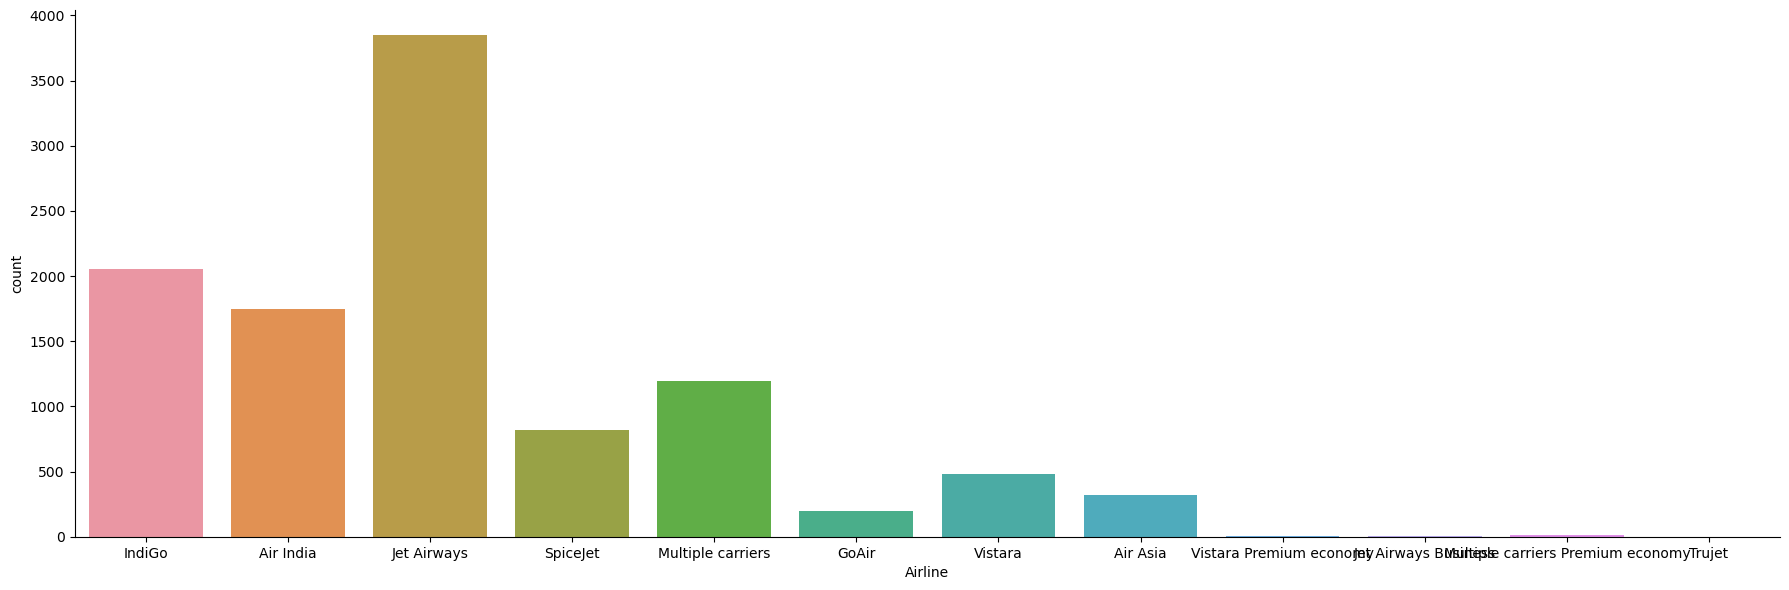

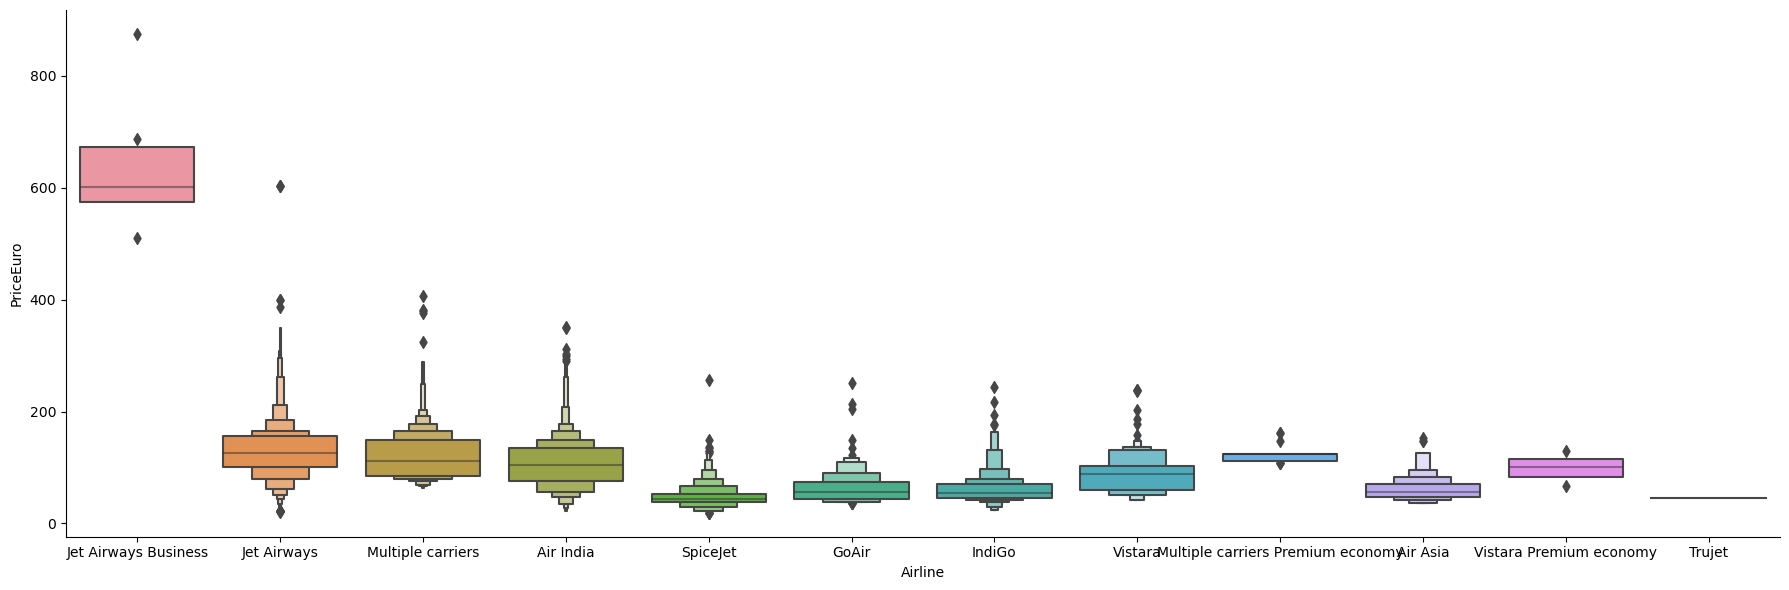

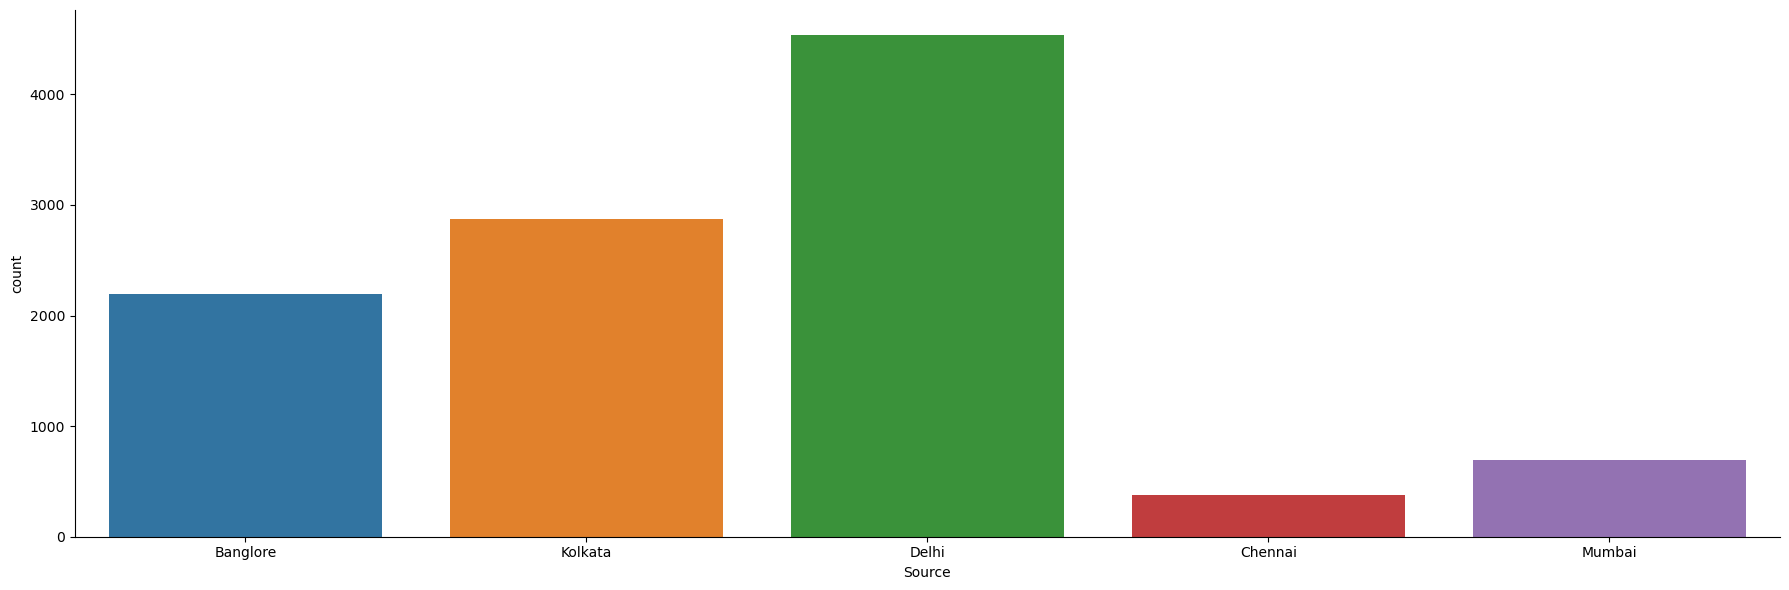

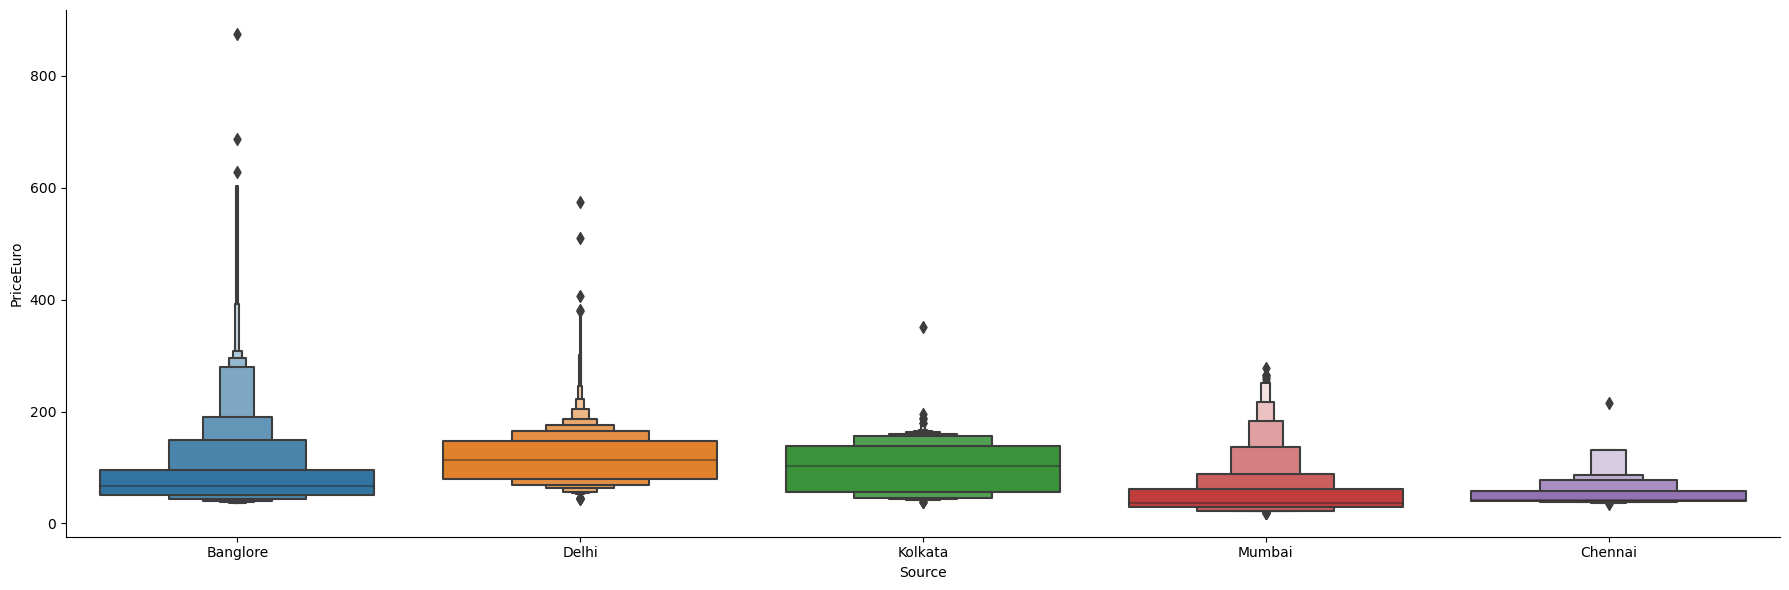

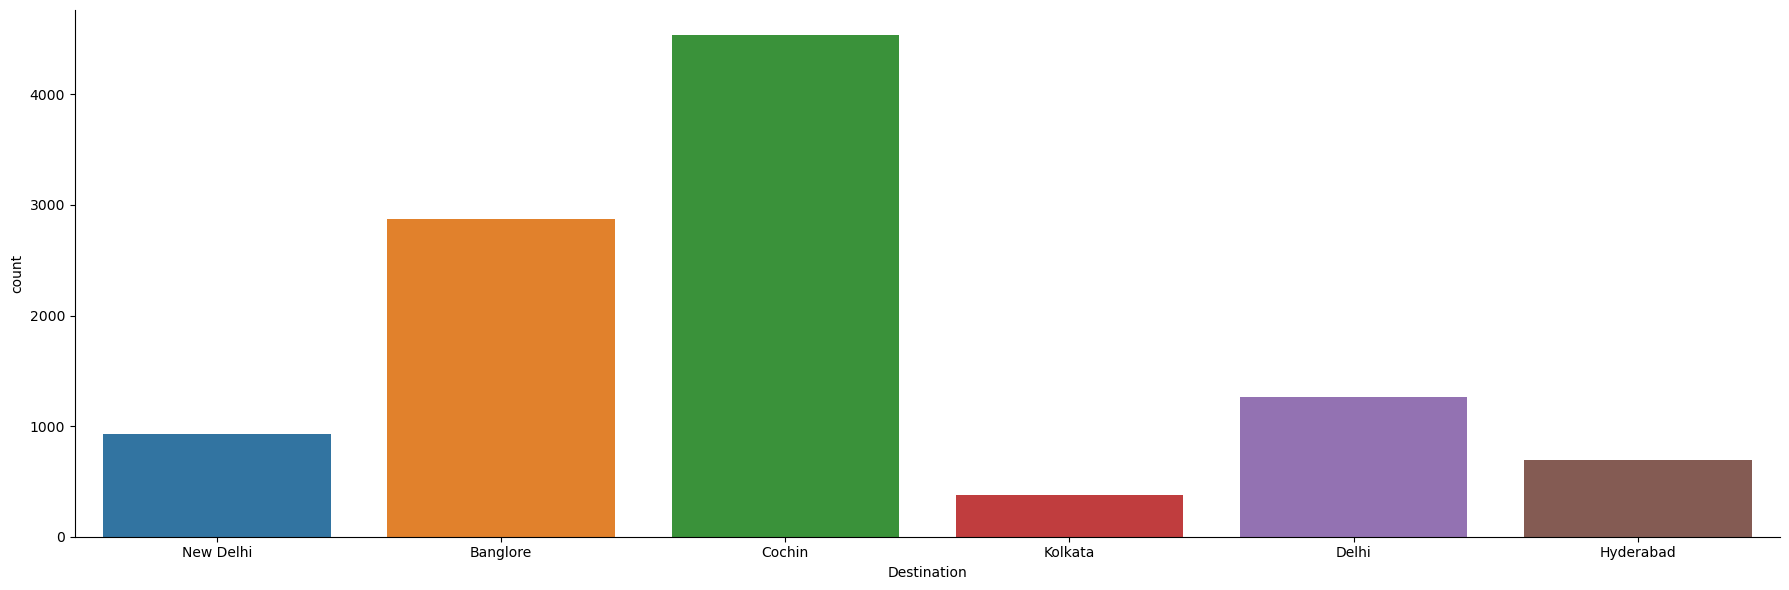

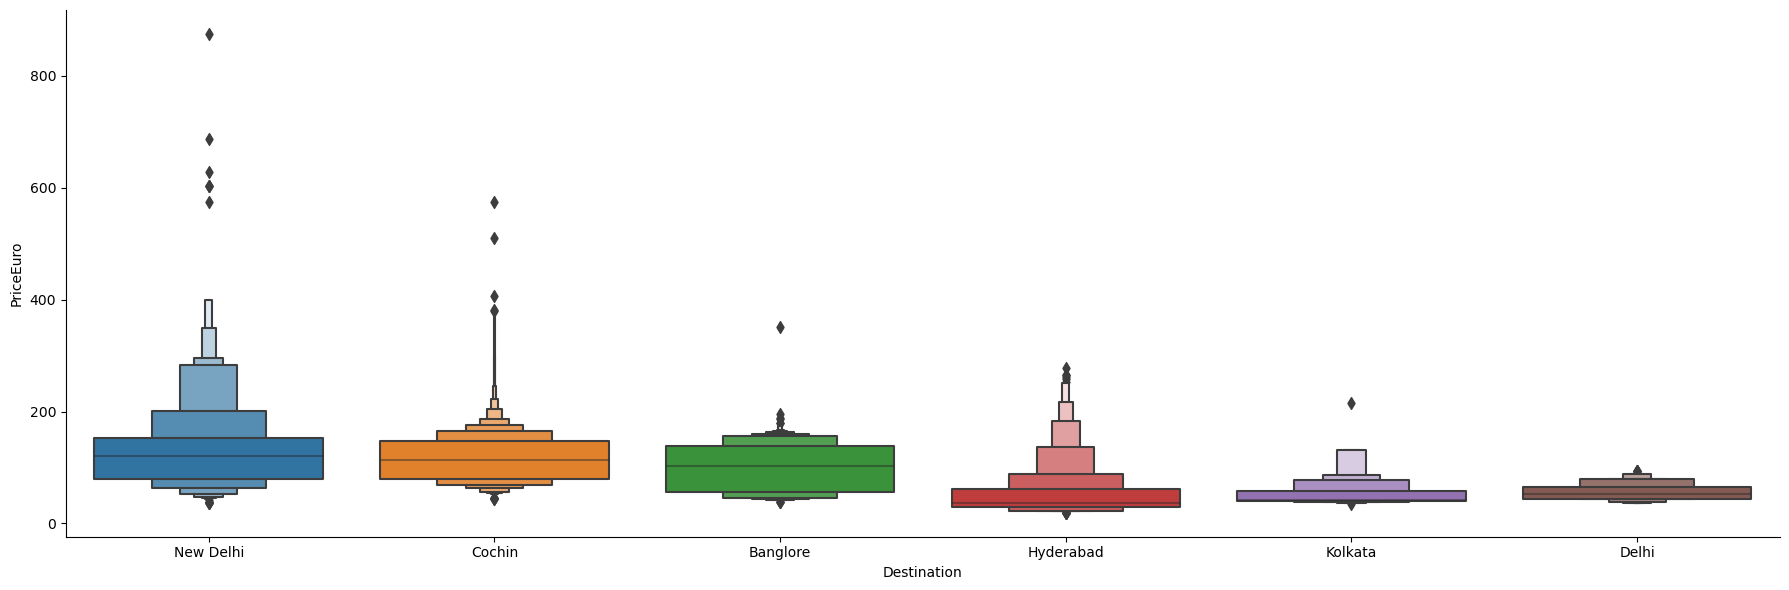

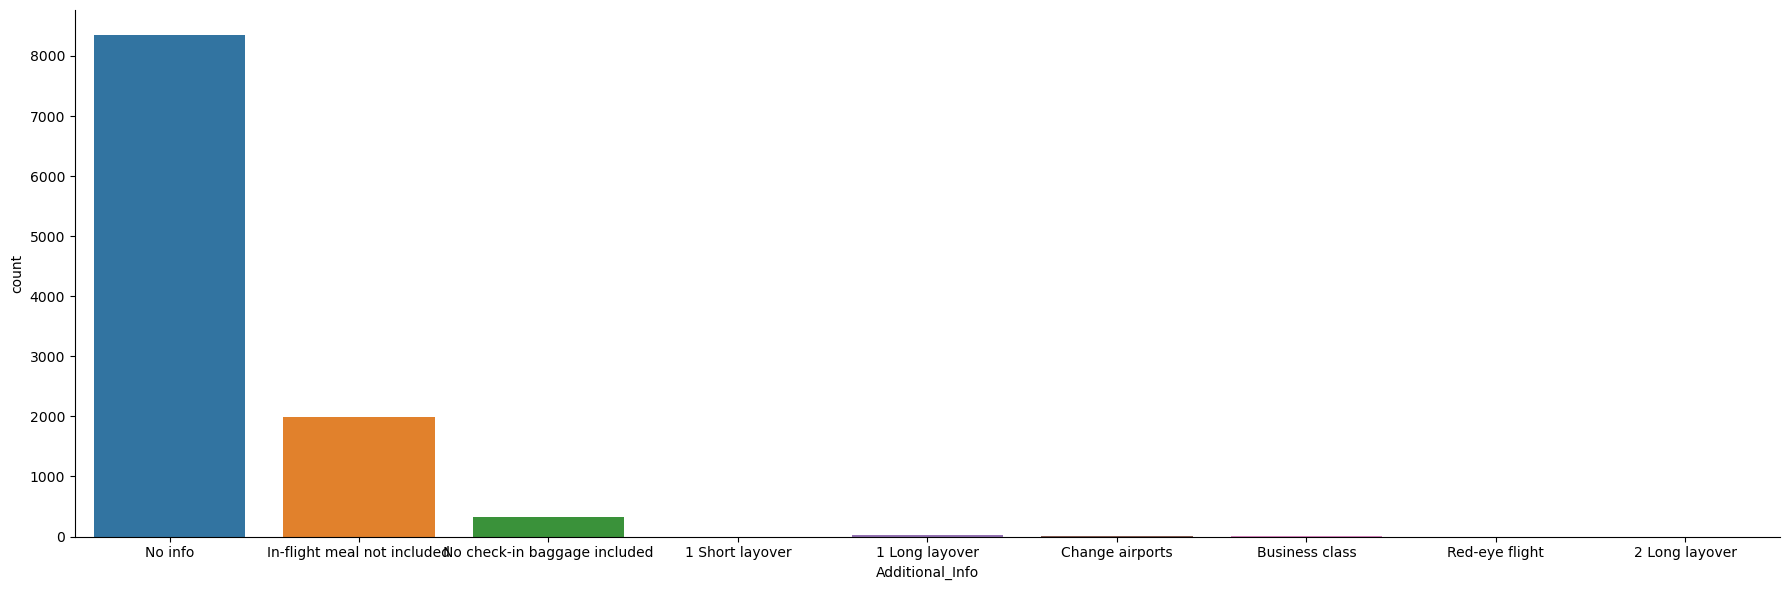

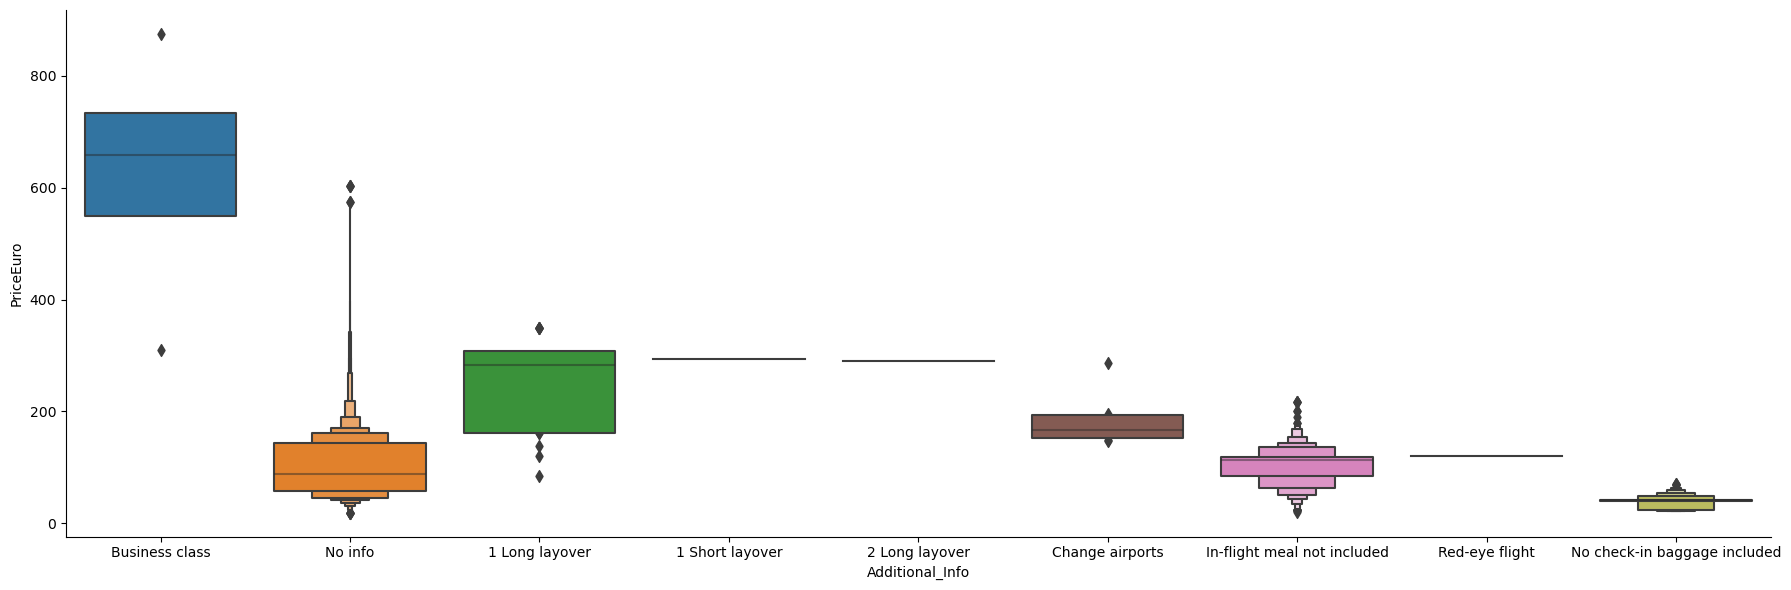

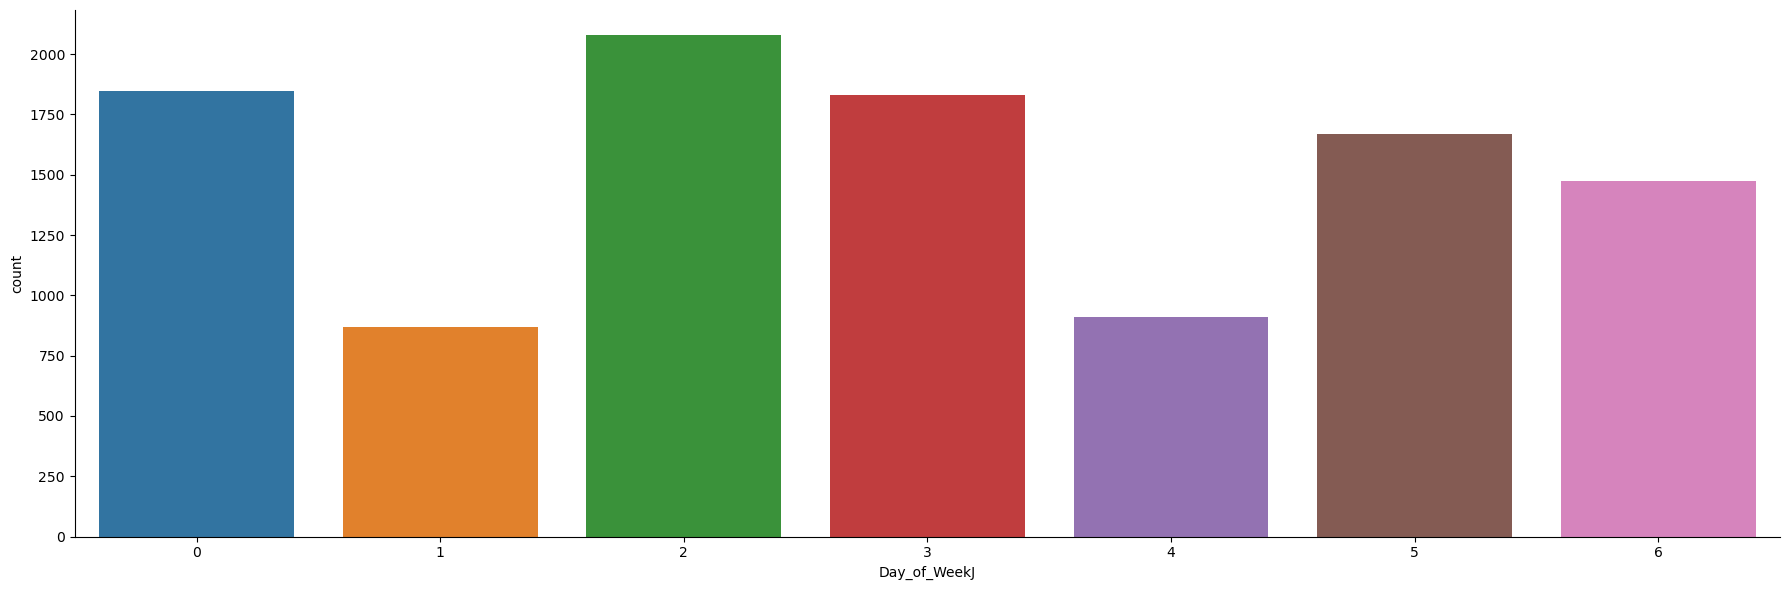

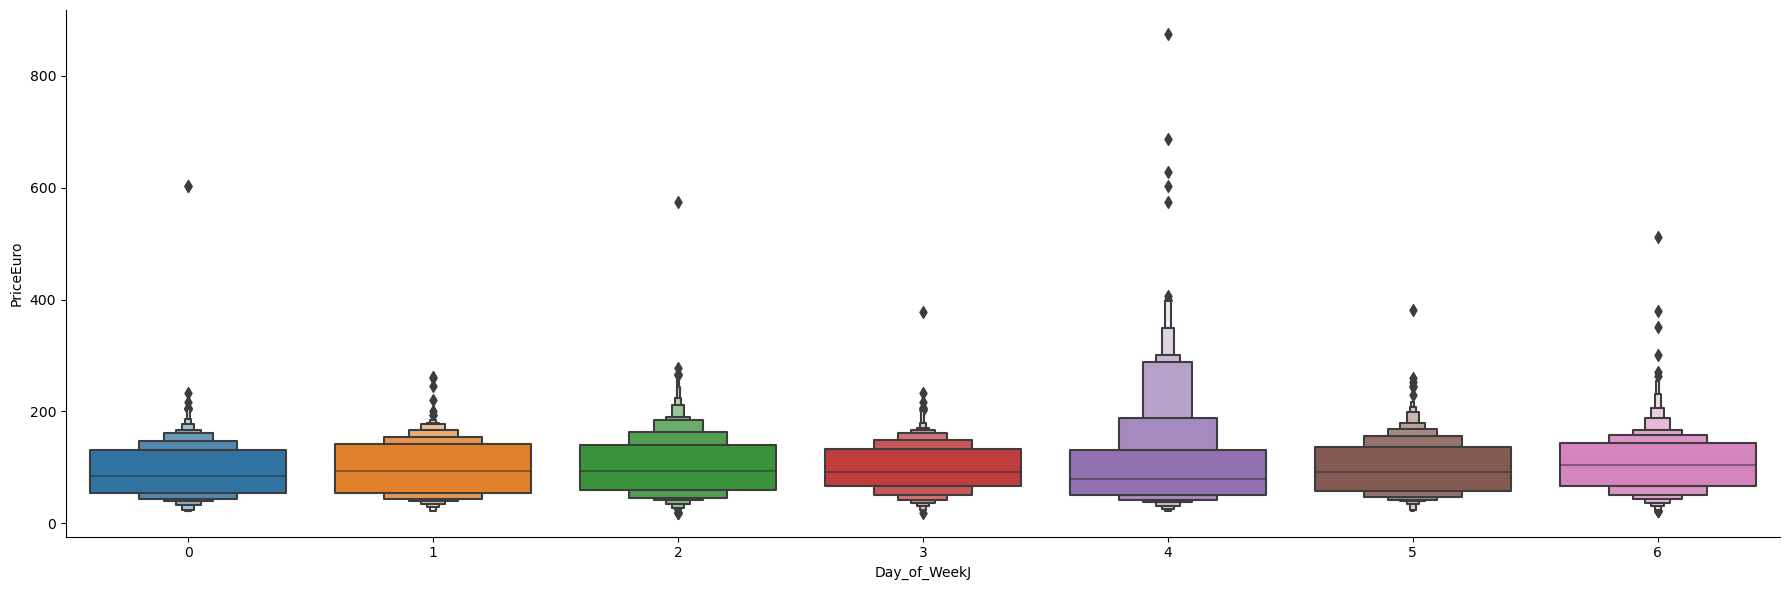

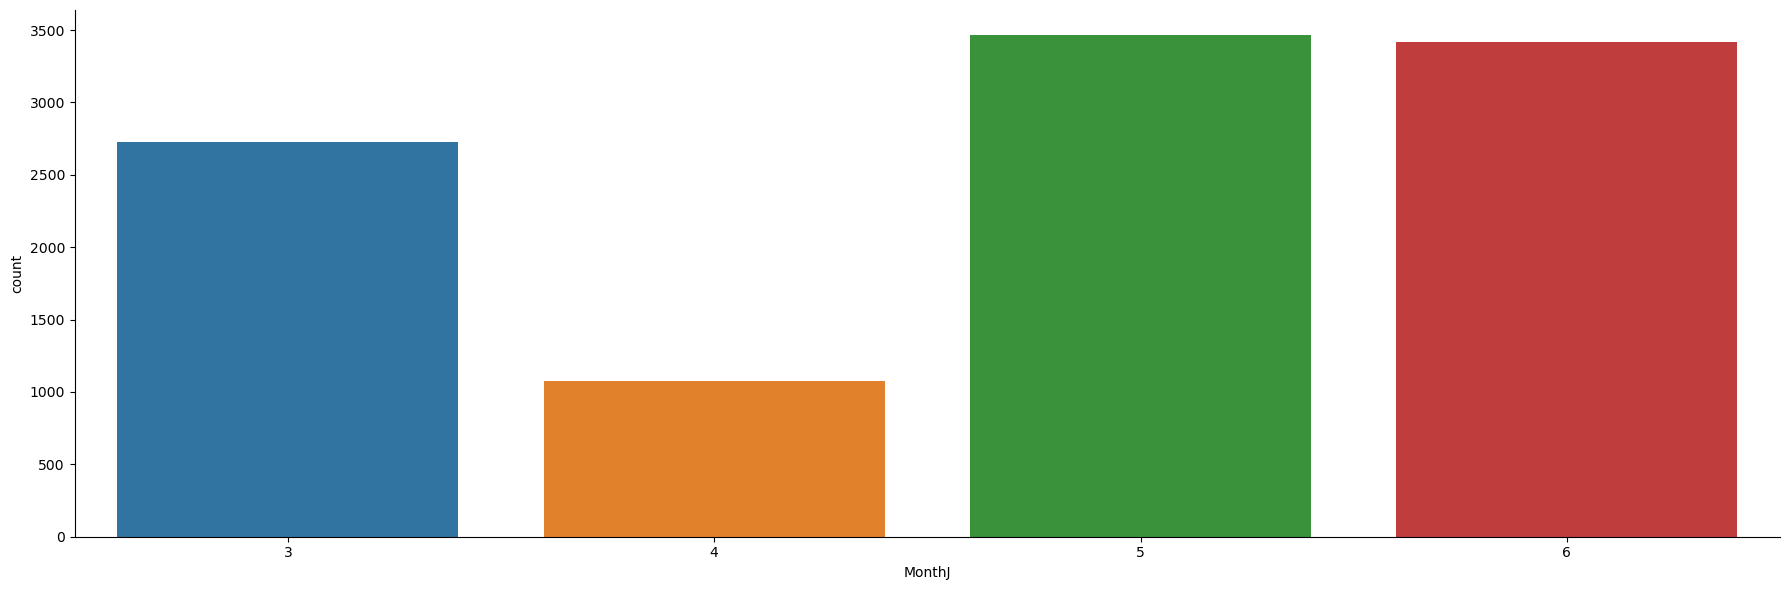

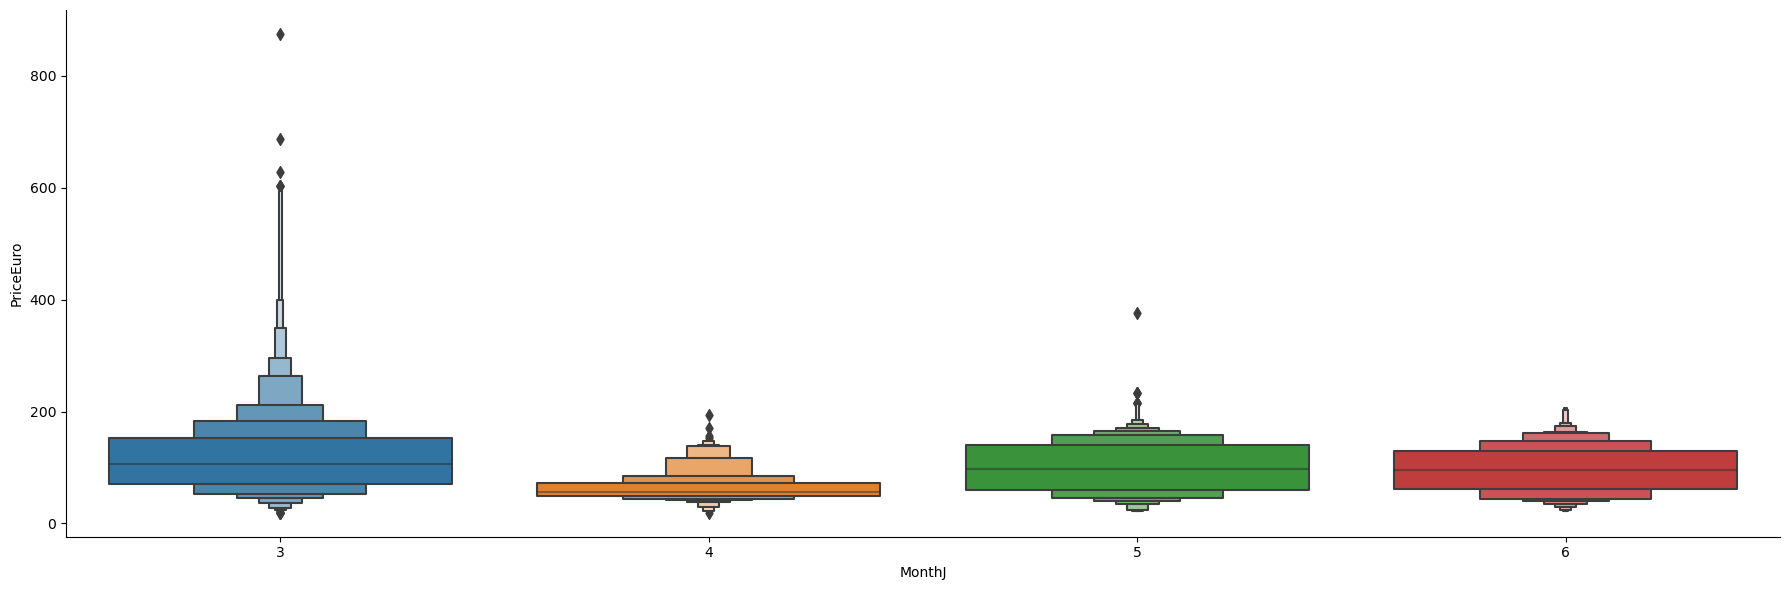

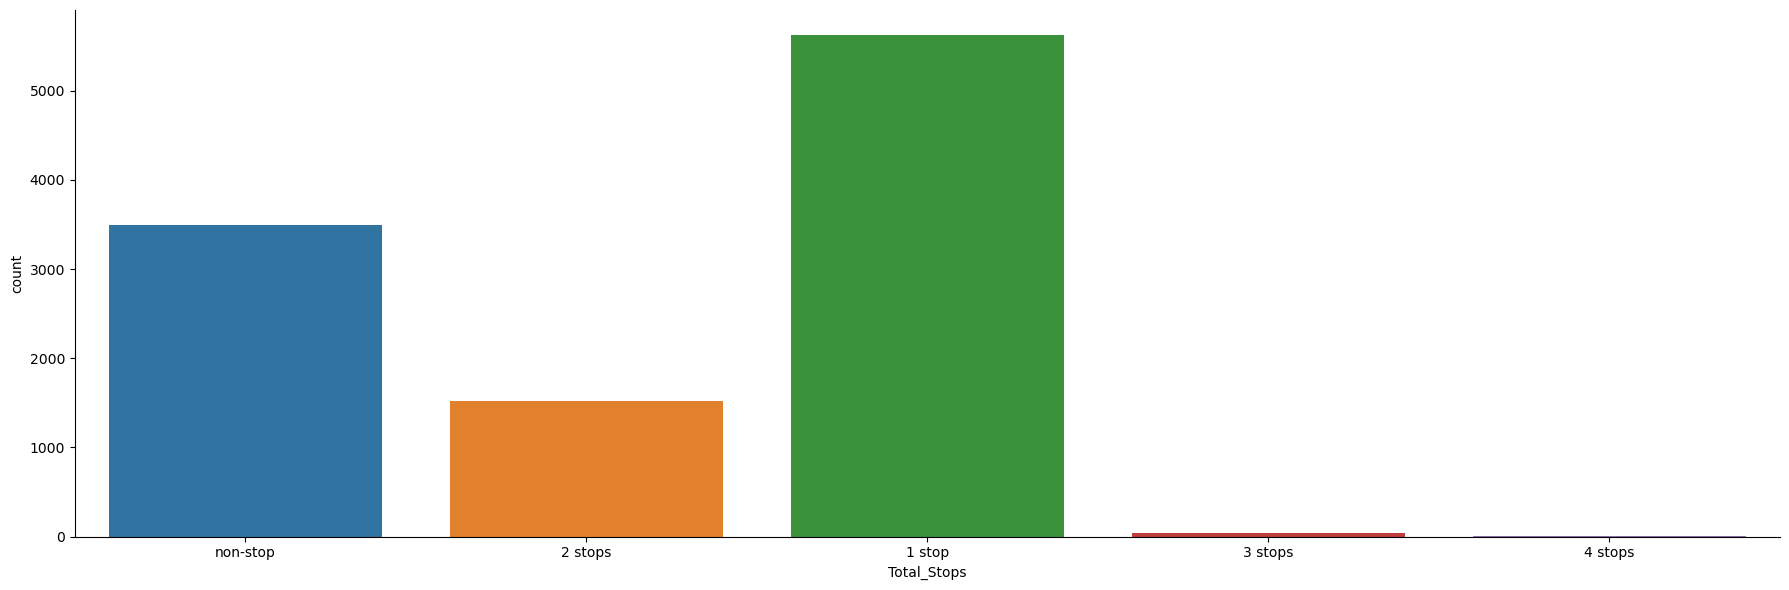

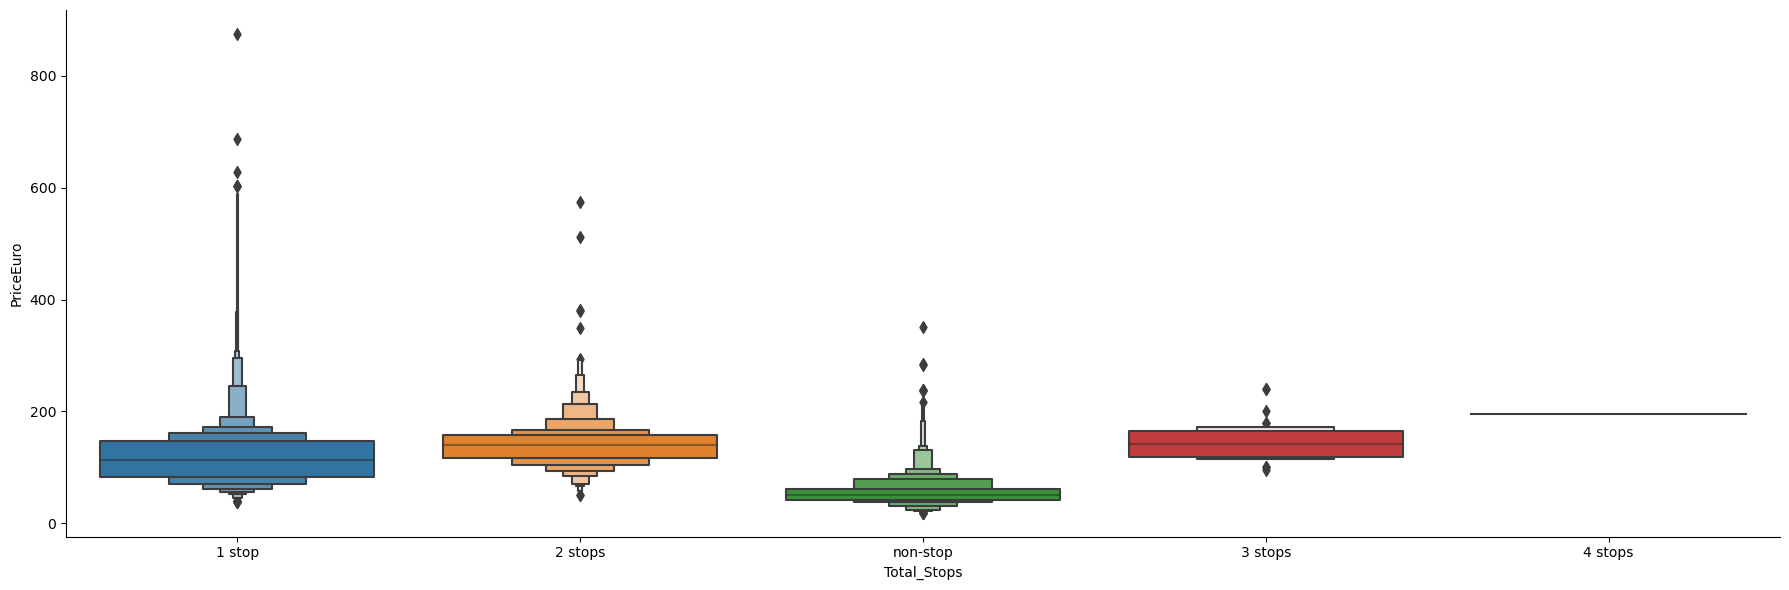

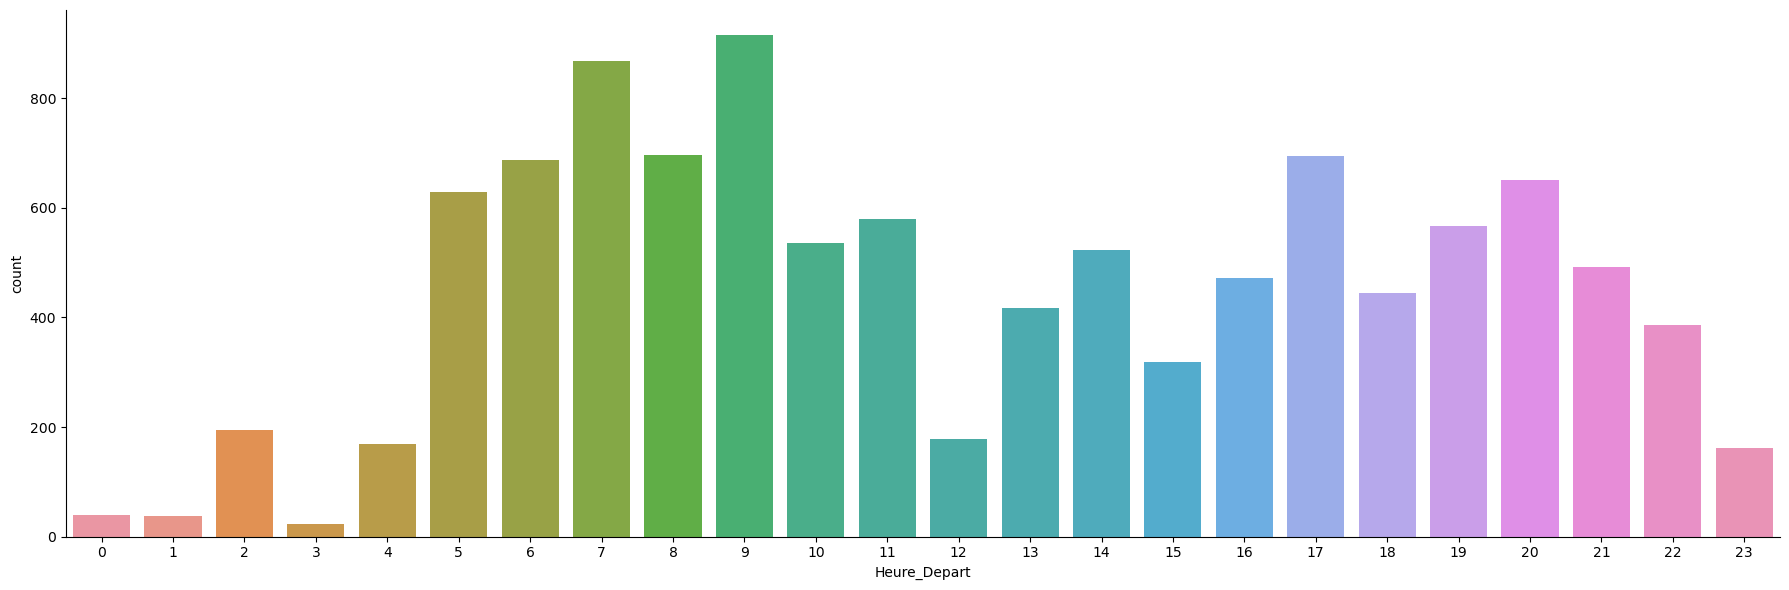

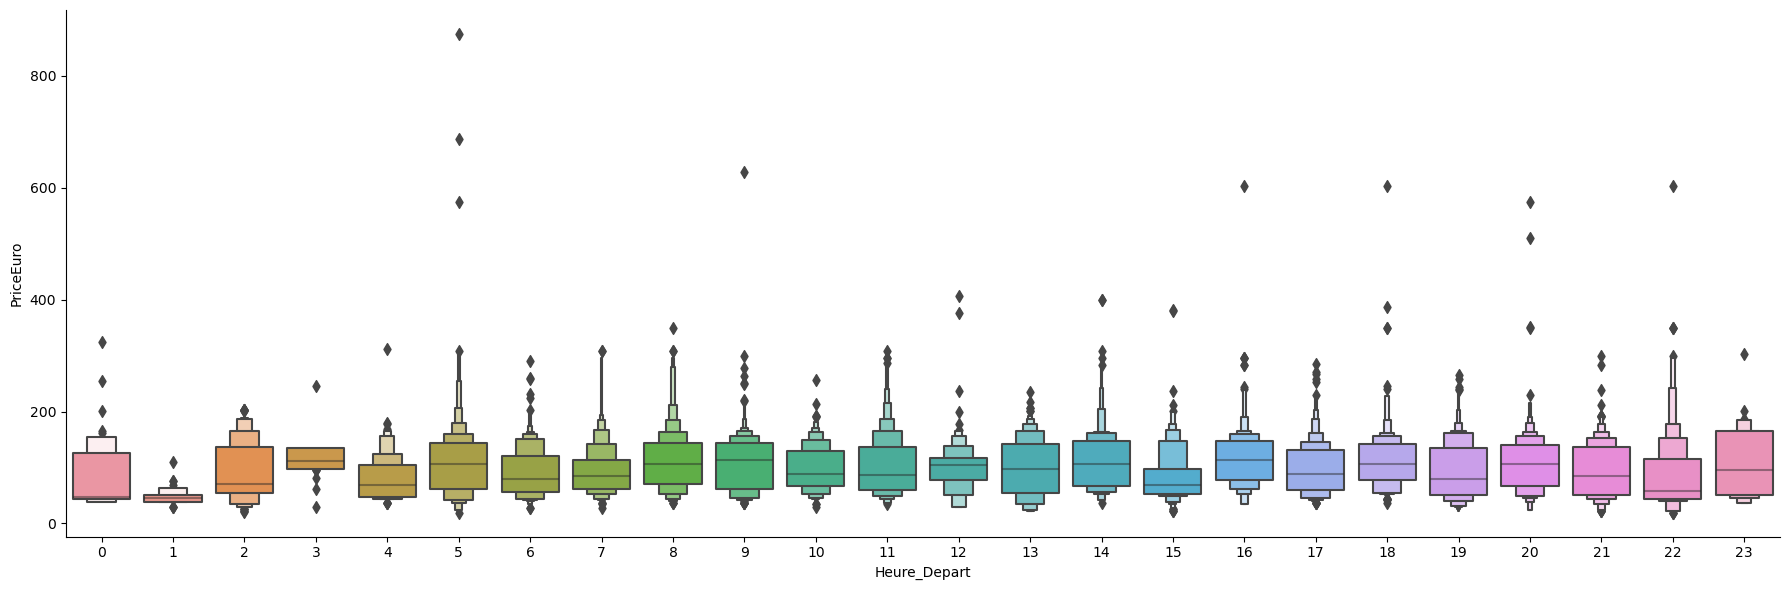

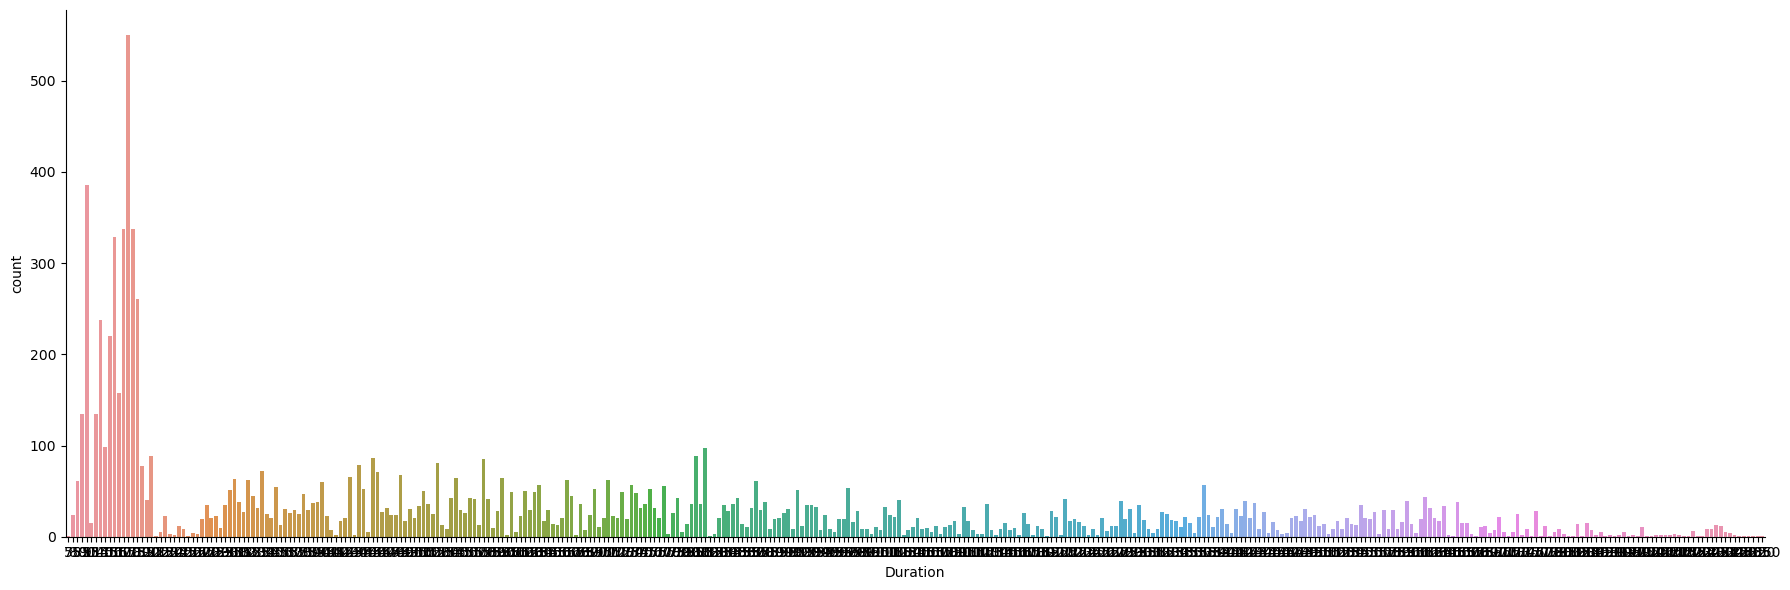

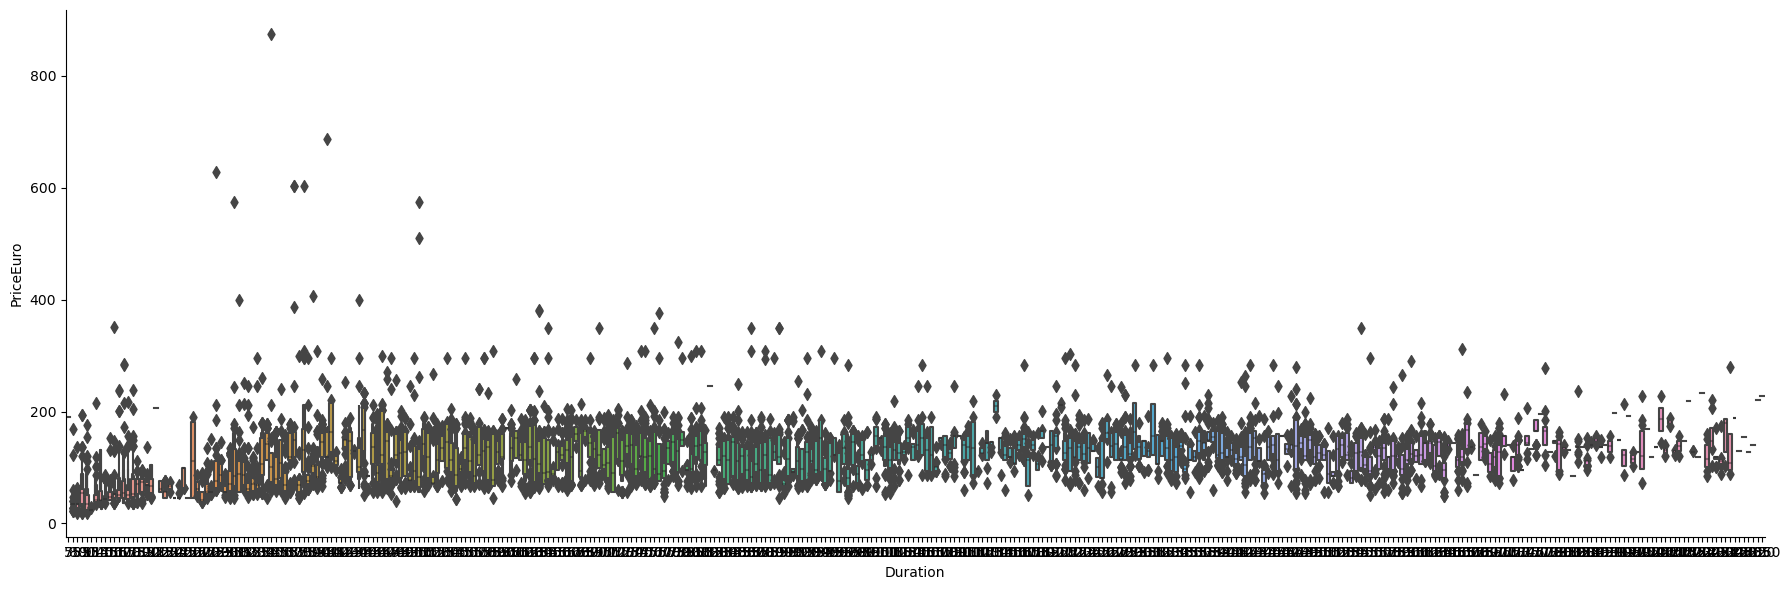

In [41]:
# Affiche les histogrammes du prix et count en fonction des autres features
for l in obj:
    sns.catplot(x = l, data = df, kind="count", height = 6, aspect=3)
    sns.catplot(y = "PriceEuro", x = l, data = df.sort_values("PriceEuro", ascending = False), kind="boxen", height = 6, aspect=3)
    
    

In [42]:
# Affiche la matrice de corrélation des données
corrMatrix = df.corr()

In [43]:
# Affiche les corrélations du prix en fonctions des autres features
plt.figure(figsize=(15,100))
corr = pd.Series(corrMatrix['PriceEuro'].values, index=corrMatrix.columns)
corr.plot(kind='barh')

<AxesSubplot:>

In [44]:
#numériser la colonne "Total_Stops" qui est une variable catégorielle ordinale et 
# remplacer les valeurs textuelles par des valeurs numériques correspondantes.
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [45]:
df.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Heure_Depart,Minute_Depart,MonthJ,...,Route_MAA → CCU,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight,PriceEuro
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,No info,22,20,3,...,0,0,0,0,0,0,0,1,0,43.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,5,50,5,...,0,0,0,0,0,0,0,1,0,84.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,9,25,6,...,0,0,0,0,0,0,0,1,0,153.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,No info,18,5,5,...,0,0,0,0,0,0,0,1,0,68.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,No info,16,50,3,...,0,0,0,0,0,0,0,1,0,146.0


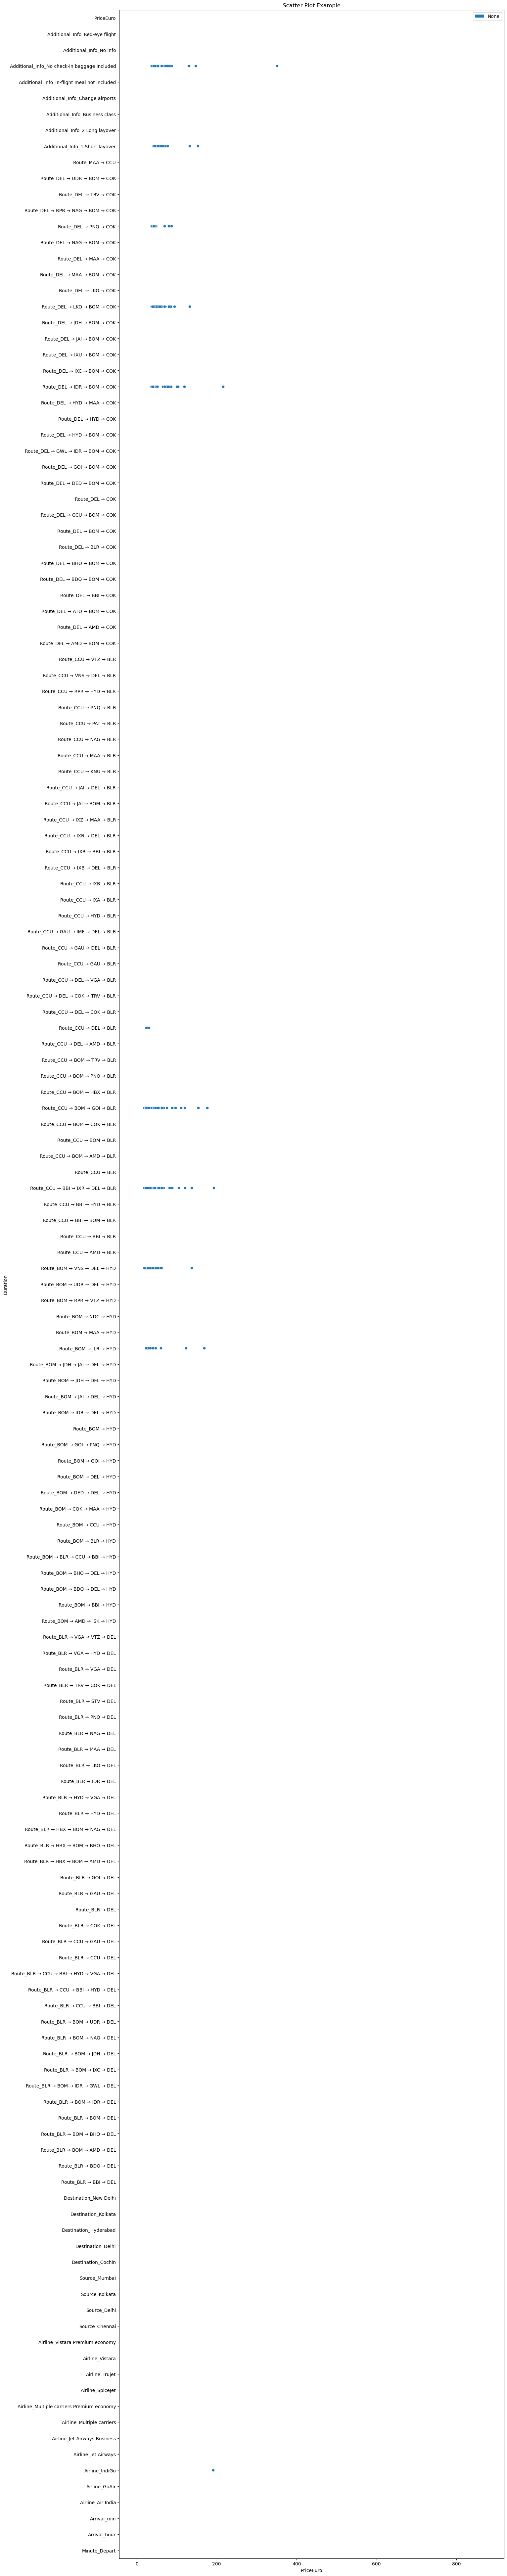

In [46]:
sns.scatterplot(x='PriceEuro', y='Duration', data=df)
plt.xlabel('PriceEuro')
plt.ylabel('Duration')
plt.title('Scatter Plot Example')
plt.show()

In [47]:
#creer une copie de dataset 
df_copy = df.copy()

In [48]:
# Supprime les colonnes du même nom que celles dans to_drop
to_drop = ['Airline', 'Source', 'Destination', 'Additional_Info', 'Route']
df_copy= df_copy.drop(columns=to_drop)

In [49]:
df_copy.head(5)

,Duration,Total_Stops,Heure_Depart,Minute_Depart,MonthJ,Day_of_WeekJ,Arrival_hour,Arrival_min,Airline_Air India,Airline_GoAir,...,Route_MAA → CCU,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight,PriceEuro
0,170,0,22,20,3,6,1,10,0,0,...,0,0,0,0,0,0,0,1,0,43.0
1,445,2,5,50,5,2,13,15,1,0,...,0,0,0,0,0,0,0,1,0,84.0
2,1140,2,9,25,6,6,4,25,0,0,...,0,0,0,0,0,0,0,1,0,153.0
3,325,1,18,5,5,6,23,30,0,0,...,0,0,0,0,0,0,0,1,0,68.0
4,285,1,16,50,3,4,21,35,0,0,...,0,0,0,0,0,0,0,1,0,146.0


In [50]:
print(df_copy.describe())

           Duration   Total_Stops  Heure_Depart  Minute_Depart        MonthJ  \
count  10682.000000  10682.000000  10682.000000   10682.000000  10682.000000   
mean     643.020502      0.824190     12.491013      24.409287      4.708575   
std      507.830133      0.675229      5.748820      18.767801      1.164408   
min        5.000000      0.000000      0.000000       0.000000      3.000000   
25%      170.000000      0.000000      8.000000       5.000000      3.000000   
50%      520.000000      1.000000     11.000000      25.000000      5.000000   
75%      930.000000      1.000000     18.000000      40.000000      6.000000   
max     2860.000000      4.000000     23.000000      55.000000      6.000000   

       Day_of_WeekJ  Arrival_hour   Arrival_min  Airline_Air India  \
count  10682.000000  10682.000000  10682.000000       10682.000000   
mean       2.935125     13.349186     24.690601           0.163921   
std        2.006591      6.859317     16.506808           0.370221   

Visualisation et analyse de la destribution des prix 

In [51]:
prices = df_copy['PriceEuro']
print("Moyenne:", prices.mean())
print("Médiane:", prices.median())
print("Ecart-type:", prices.std())
print("Minimum:", prices.min())
print("Maximum:", prices.max())

Moyenne: 99.94439243587343
Médiane: 92.0
Ecart-type: 50.7212939048211
Minimum: 19.0
Maximum: 875.0


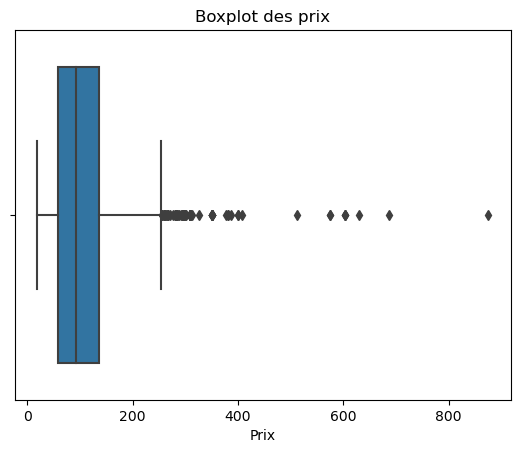

In [52]:
sns.boxplot(x=prices)
plt.xlabel("Prix")
plt.title("Boxplot des prix")
plt.show()

In [53]:
sns.displot(x= 'PriceEuro', data=df_copy);

Elimination des outliers prix > 300

In [54]:
# Créez un masque booléen pour les lignes dont le prix est supérieur à 400
mask = df_copy['PriceEuro'] > 300

# Supprimez les lignes correspondantes en utilisant le masque booléen
df_copy = df_copy.drop(df_copy[mask].index)

In [55]:
sns.displot(x= 'PriceEuro', data=df_copy);

In [56]:
prices = df_copy['PriceEuro']
print("Moyenne:", prices.mean())
print("Médiane:", prices.median())
print("Ecart-type:", prices.std())
print("Minimum:", prices.min())
print("Maximum:", prices.max())

Moyenne: 98.86275246594646
Médiane: 92.0
Ecart-type: 46.68759510987064
Minimum: 19.0
Maximum: 300.0


In [57]:
df_copy.shape

(10645, 164)

# Entrainement des models 


In [58]:
## les colonnes (sauf la dernière) correspondent aux variables explicatives du prix (features)
features = df_copy.columns[:-1]


# la derniere colonne, PriceEuro, correspond à la valeur qu'on veut prédire
label = df_copy.columns[-1]

In [59]:
features, label

(Index(['Duration', 'Total_Stops', 'Heure_Depart', 'Minute_Depart', 'MonthJ',
        'Day_of_WeekJ', 'Arrival_hour', 'Arrival_min', 'Airline_Air India',
        'Airline_GoAir',
        ...
        'Route_DEL → UDR → BOM → COK', 'Route_MAA → CCU',
        'Additional_Info_1 Short layover', 'Additional_Info_2 Long layover',
        'Additional_Info_Business class', 'Additional_Info_Change airports',
        'Additional_Info_In-flight meal not included',
        'Additional_Info_No check-in baggage included',
        'Additional_Info_No info', 'Additional_Info_Red-eye flight'],
       dtype='object', length=163),
 'PriceEuro')

In [60]:
# on convertit les tableaux pandas en tabeaux numpy
X = df_copy[features].values
Y = df_copy[label].values

In [61]:
 X.shape, Y.shape

((10645, 163), (10645,))

<span style="font-size: 25px; color: blue;"> Division data train et data test </span><br><br>
30% pour le data test et 70% pour les data train 

In [62]:
# Effectuer la division aléatoire des données
X1_train, X1_test, Y1_train, Y1_test =  sklearn.model_selection.train_test_split(X, Y, test_size=0.3, random_state=42)

<span style="font-size: 30px; color: Red;"> Fit par regression lineaire </span>

In [63]:
linReg = LinearRegression()
linReg.fit(X1_train, Y1_train)

LinearRegression()

In [64]:
print(linReg.coef_ )

[ 3.37944154e-06  9.55329552e+10  8.11710862e-02 -3.62274826e-02
 -2.45834343e+00  1.74131915e+00 -2.14829339e-02  5.52267624e-02
  1.53030736e+01 -5.01346529e+00  1.79703617e+00  5.69899921e+01
  2.91665331e+10  2.72370548e+01  2.12455965e+01 -2.79664421e+00
  3.60947830e+09  1.45678864e+01  2.35653267e+10  1.46111154e+11
 -4.79456253e+10 -5.12481436e+10 -2.06441610e+10 -2.36383715e+10
  1.71430029e+10  2.59800269e+09 -1.11805554e+10  1.71430029e+10
 -9.81595963e-02 -4.56301645e+01 -9.55329551e+10 -9.55329551e+10
  1.07345572e+01 -9.55329551e+10 -1.91065910e+11 -9.55329551e+10
 -9.55329551e+10 -9.55329551e+10 -9.55329551e+10 -9.55329552e+10
 -1.91065910e+11  1.31166934e+09  8.80648033e+00 -9.55329552e+10
 -2.49148375e+01  9.55329551e+10  4.54080316e+00 -1.45179511e+01
 -1.91065910e+11 -1.91065910e+11 -1.91065910e+11 -4.94100879e+01
 -9.55329552e+10 -3.62674128e+01 -2.81713218e+01 -2.08218411e+01
  1.19351315e+01  3.56584611e+01  1.70409058e+08 -9.55329551e+10
 -1.36229774e+01 -9.55329

In [65]:
print(linReg.intercept_ )

-112675957917.36586


In [66]:
predictions = linReg.predict(X1_train)

In [67]:
xmin= np.minimum(Y1_train.min(), predictions.min() )-1
xmax= np.maximum(Y1_train.max(), predictions.max() )+1
ymin= np.minimum(Y1_train.min(), predictions.min() )-1
ymax= np.maximum(Y1_train.max(), predictions.max() )+1


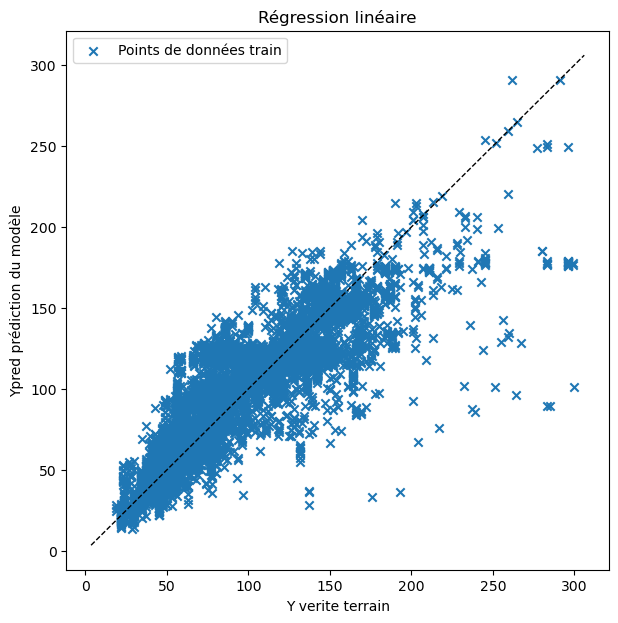

In [170]:
fig = plt.figure(figsize = (7, 7))
plt.scatter(Y1_train,predictions, marker='x',label='Points de données train')
plt.plot([xmin,xmax], [ymin,ymax], lw=1, color='k', ls='--')
# Ajouter une légende et des étiquettes pour les axes
plt.legend()
plt.xlabel( 'Y verite terrain' )
plt.ylabel( 'Ypred prédiction du modèle' )
plt.title('Régression linéaire')
plt.show()

In [69]:
# Calcul du score des prédictions du train
MSE = metrics.mean_squared_error(Y1_train, predictions)
RMSE = np.sqrt(MSE)
EP = RMSE /np.mean(Y1_train) #quantifie le pourcentage d'erreur des prédictions du train

print('train_MSE:', MSE)
print('train_RMSE:', RMSE)
print('R² score: {0:.2%}'.format(metrics.r2_score(Y1_train, predictions)))
print("train_Pourcentage de bonne prédiction: {0:.2%}".format(1-EP))

train_MSE: 519.3858101189767
train_RMSE: 22.790037519033984
R² score: 75.93%
train_Pourcentage de bonne prédiction: 76.85%


<span style="font-size: 20px; color: green;"> Appliquer la régression sur les donneés test  </span><br>

In [70]:
predict = linReg.predict(X1_test)

In [71]:
xmin= np.minimum(Y1_test.min(), predict.min() )-1
xmax= np.maximum(Y1_test.max(), predict.max() )+1
ymin= np.minimum(Y1_test.min(), predict.min() )-1
ymax= np.maximum(Y1_test.max(), predict.max() )+1

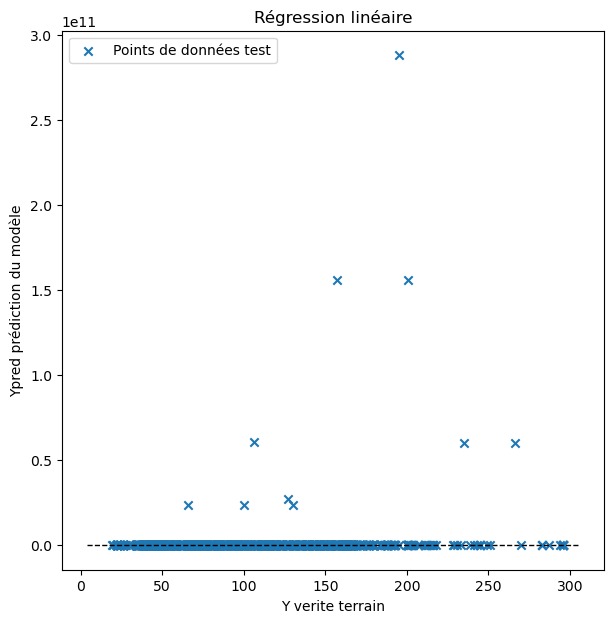

In [169]:
fig = plt.figure(figsize = (7, 7))
plt.scatter(Y1_test,predict, marker='x',label='Points de données test')
plt.plot([xmin,xmax], [ymin,ymax], lw=1, color='k', ls='--')
# Ajouter une légende et des étiquettes pour les axes
plt.legend()
plt.xlabel( 'Y verite terrain' )
plt.ylabel( 'Ypred prédiction du modèle' )
plt.title('Régression linéaire')
plt.show()

In [73]:
# Calcul du score r2 des prédictions du test
MSE = metrics.mean_squared_error(Y1_test, predict)
RMSE = np.sqrt(MSE)
EP = RMSE /np.mean(Y1_test) #quantifie le pourcentage d'erreur des prédictions du test

print('test_MSE:', MSE)
print('test_RMSE:', RMSE)
print('R² score: {0:.2%}'.format(metrics.r2_score(Y1_test, predict)))
print("test_Pourcentage de bonne prédiction: {0:.2%}".format(1-EP))


test_MSE: 4.533710229399449e+19
test_RMSE: 6733283173.459622
R² score: -2034289486042121984.00%
test_Pourcentage de bonne prédiction: -6746526881.91%


<span style="font-size: 25px; color: blue;"> selection des meilleurs  features </span><br>
afin de resoudre le probleme de l'overfitting 

In [74]:
#Réduire le nombre de variables explicatives en supprimant les caractéristiques les moins importantes 

estimator = ExtraTreesRegressor(n_estimators=100, random_state=42)
estimator.fit(df_copy[features], Y)

# Utiliser SelectFromModel pour sélectionner les features importantes
model = SelectFromModel(estimator, prefit=True)
selected_features = features[model.get_support()]

# Récupérer les importances des features sélectionnées
selected_importances = estimator.feature_importances_[model.get_support()]

# Créer un DataFrame avec les features sélectionnées et leurs importances#
selected_features_df = pd.DataFrame({'Feature': selected_features, 'Importance': selected_importances})

# Trier le DataFrame par importance
selected_features_df = selected_features_df.sort_values(by='Importance', ascending=False)

# Afficher les features importantes et leurs importances
print("Features importantes :\n", selected_features_df)

Features importantes :
                                         Feature  Importance
1                                   Total_Stops    0.284042
10                          Airline_Jet Airways    0.164830
0                                      Duration    0.091391
18  Additional_Info_In-flight meal not included    0.085772
5                                  Day_of_WeekJ    0.067295
4                                        MonthJ    0.045083
11                    Airline_Multiple carriers    0.021847
3                                 Minute_Depart    0.016019
2                                  Heure_Depart    0.015149
8                             Airline_Air India    0.014790
9                                Airline_IndiGo    0.014605
12                                 Source_Delhi    0.013549
15                        Route_BLR → BOM → DEL    0.013093
6                                  Arrival_hour    0.011800
13                           Destination_Cochin    0.011566
17              

In [75]:
X = df_copy[selected_features]
Y = df_copy['PriceEuro']

In [76]:
#Reduir de 163 features a 20 features 
X.shape, Y.shape

((10645, 20), (10645,))

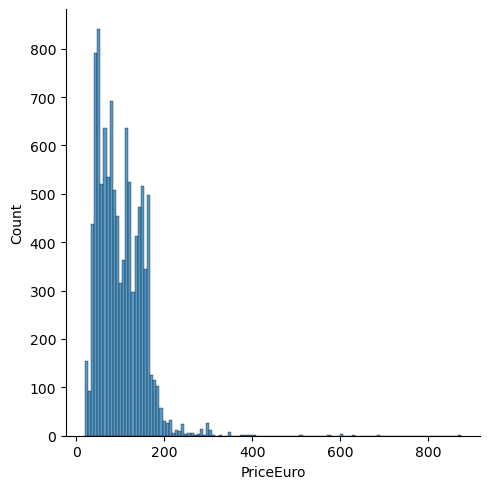

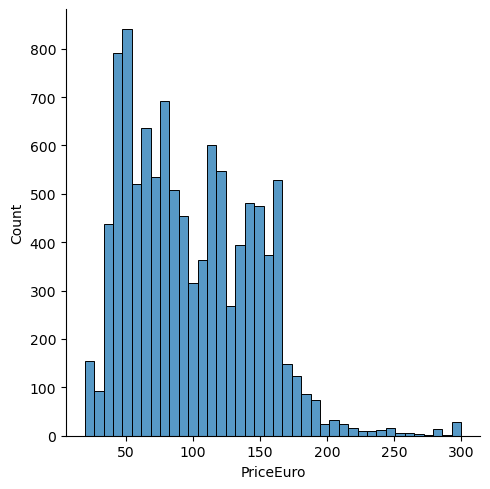

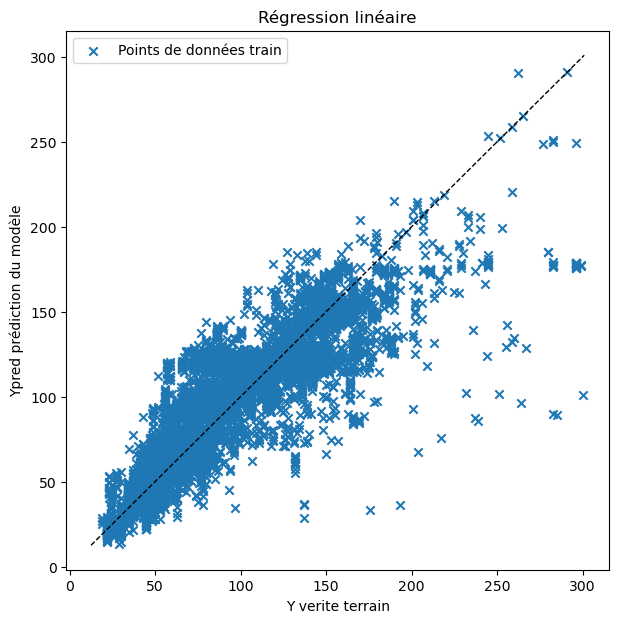

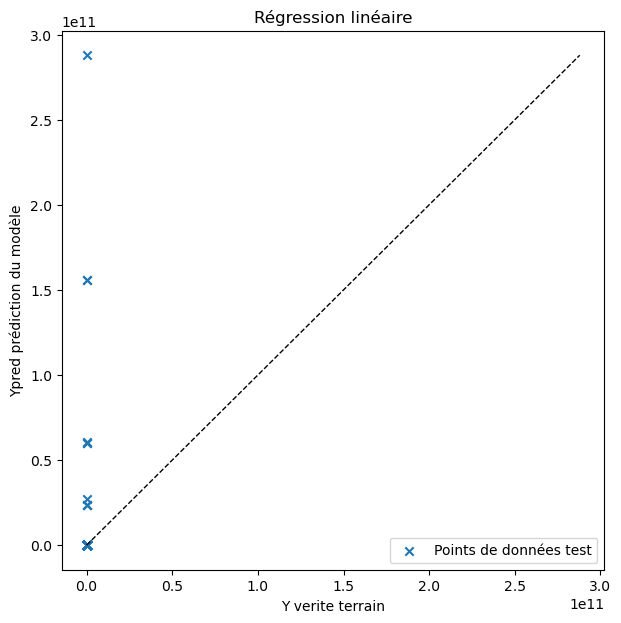

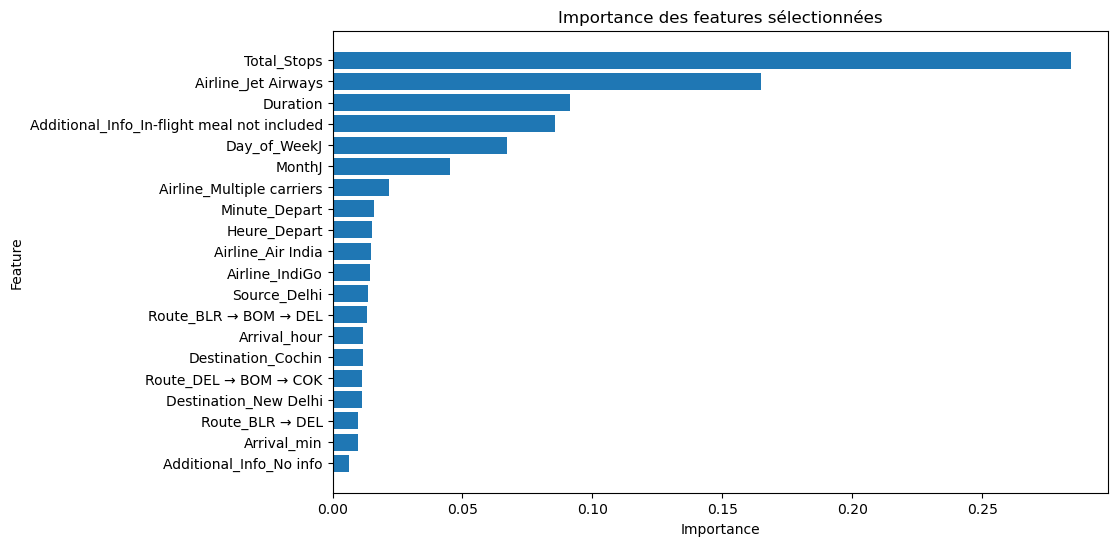

In [77]:

# Créer un graphique à barres horizontal pour les features importantes
plt.figure(figsize=(10, 6))
plt.barh(selected_features_df['Feature'], selected_features_df['Importance'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Importance des features sélectionnées")

# Inverser l'ordre des étiquettes sur l'axe y pour afficher les features les plus importants en haut
plt.gca().invert_yaxis()

# Afficher le graphique
plt.show()


In [78]:
# Effectuer la division aléatoire des données
X_train, X_test, Y_train, Y_test =  sklearn.model_selection.train_test_split(X, Y, test_size=0.3, random_state=42)

<span style="font-size: 30px; color: Red;"> Fit par regression lineaire après selection des meilleurs features </span>

In [79]:
linRegNew = LinearRegression()
linRegNew.fit(X_train, Y_train)

LinearRegression()

In [80]:
print(linRegNew.coef_ )

[ 5.51955075e-03  3.34557006e+01  2.07268080e-01 -4.28601393e-02
 -2.46662971e+00  1.80819669e+00 -4.12007242e-03  5.15827832e-02
  9.17240917e+00 -3.90476604e+00  5.31199331e+01  2.43702980e+01
 -3.67706975e+00 -3.67706975e+00  1.39292109e+01  1.94384346e+01
 -2.10772592e-01  2.13480925e+01 -3.34540870e+01  6.49020712e+00]


In [81]:
Y_predictions = linRegNew.predict(X_train)

In [82]:
xmin= np.minimum(Y_train.min(), Y_predictions.min() )-1
xmax= np.maximum(Y_train.max(), Y_predictions.max() )+1
ymin= np.minimum(Y_train.min(), Y_predictions.min() )-1
ymax= np.maximum(Y_train.max(), Y_predictions.max() )+1

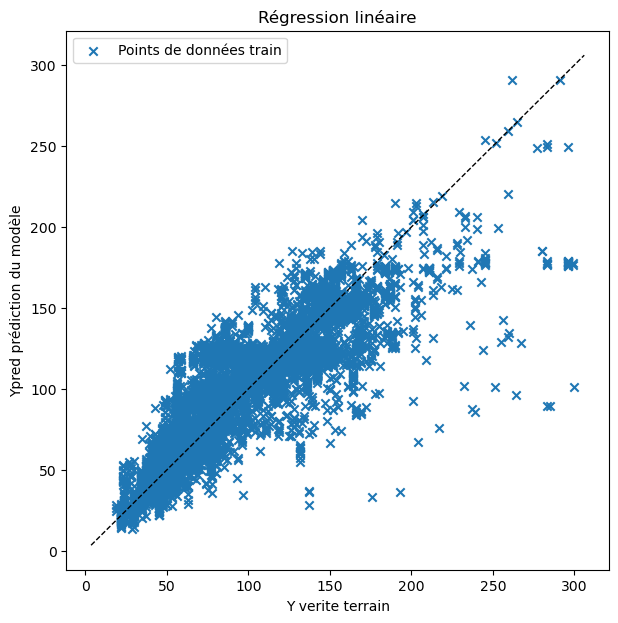

In [168]:
fig = plt.figure(figsize = (7, 7))
plt.scatter(Y_train,predictions, marker='x',label='Points de données train')
plt.plot([xmin,xmax], [ymin,ymax], lw=1, color='k', ls='--')
# Ajouter une légende et des étiquettes pour les axes
plt.legend()
plt.xlabel( 'Y verite terrain' )
plt.ylabel( 'Ypred prédiction du modèle' )
plt.title('Régression linéaire')
plt.show()

In [84]:
from sklearn.metrics import r2_score
# Calcul du score des prédictions du train
MSE = metrics.mean_squared_error(Y_train, Y_predictions)
RMSE = np.sqrt(MSE)
EP = RMSE /np.mean(Y_train) #quantifie le pourcentage d'erreur des prédictions du train

print('train_MSE:', MSE)
print('train_RMSE:', RMSE)
print('R² score: {0:.2%}'.format(metrics.r2_score(Y_train, Y_predictions)))
print("train_Pourcentage de bonne prédiction:: {0:.2%}".format(1-EP))

train_MSE: 680.0411614448459
train_RMSE: 26.077598843544738
R² score: 68.49%
train_Pourcentage de bonne prédiction:: 73.51%


<span style="font-size: 20px; color: green;"> Appliquer la régression sur les donneés test  </span><br>

In [85]:
linRegNew.fit(X_test, Y_test)

LinearRegression()

In [86]:
Y_predictAS = linRegNew.predict(X_test)

In [87]:
xmin= np.minimum(Y_test.min(), Y_predictAS.min() )-1
xmax= np.maximum(Y_test.max(), Y_predictAS.max() )+1
ymin= np.minimum(Y_test.min(), Y_predictAS.min() )-1
ymax= np.maximum(Y_test.max(), Y_predictAS.max() )+1

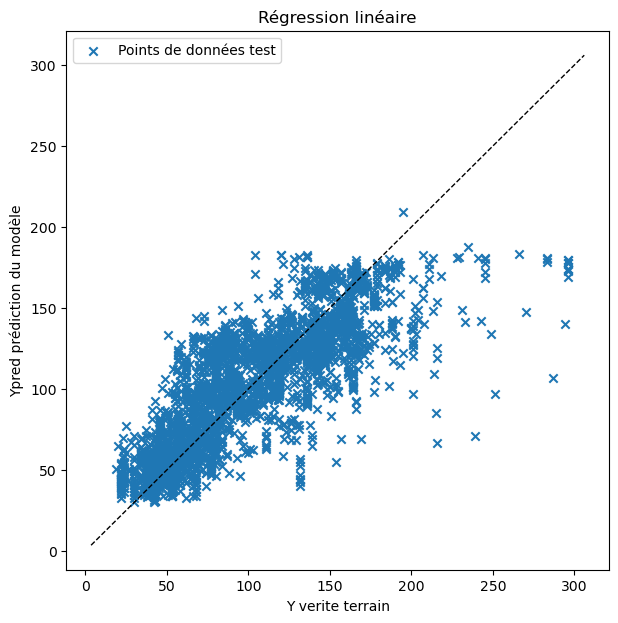

In [167]:
fig = plt.figure(figsize = (7, 7))
plt.scatter(Y_test,Y_predictAS, marker='x',label='Points de données test')
plt.plot([xmin,xmax], [ymin,ymax], lw=1, color='k', ls='--')
# Ajouter une légende et des étiquettes pour les axes
plt.legend()
plt.xlabel( 'Y verite terrain' )
plt.ylabel( 'Ypred prédiction du modèle' )
plt.title('Régression linéaire')
plt.show()

In [89]:
# Calcul du score des prédictions du test
MSE = metrics.mean_squared_error(Y_test, Y_predictAS)

RMSE = np.sqrt(MSE)
EP = RMSE /np.mean(Y_test) #quantifie le pourcentage d'erreur des prédictions du test

print('test_MSE:', MSE)
print('test_RMSE:', RMSE)
print('R² score: {0:.2%}'.format(metrics.r2_score(Y_test, Y_predictAS)))
print("test_Pourcentage de bonne prédiction:: {0:.2%}".format(1-EP))


test_MSE: 702.6442062190323
test_RMSE: 26.507436809677248
R² score: 68.47%
test_Pourcentage de bonne prédiction:: 73.44%


In [90]:
# cross-validation
cv_scores = cross_val_score(linRegNew, X, Y, cv=5, scoring='neg_mean_squared_error')

# Afficher les MSE pour chaque fold
MSE_scores = -cv_scores
print("MSE pour chaque échantillon:", MSE_scores)

# Calculer les RMSE pour chaque fold
rmse_scores = np.sqrt(-cv_scores)
EP = rmse_scores /np.mean(Y)

#quantifie le pourcentage d'erreur des prédictions de chaque échantillon
percentage_list = [round((1 - e) * 100, 2) for e in EP]
percentage_str_list = [f"{p}%" for p in percentage_list]
print("RMSE pour chaque échantillon:", rmse_scores)
print("Moyenne des RMSE :", rmse_scores.mean())
print("Pourcentage de bonne prédiction par échantillon:", percentage_str_list)

# R² cross-validation
r2_scores = cross_val_score(linRegNew, X, Y, cv=5, scoring='r2')
r2_percentage_list = [f"{round(r2 * 100, 2)}%" for r2 in r2_scores]
print("R² pour chaque échantillon:", r2_percentage_list)
print("Moyenne des R² : {0:.2%}".format(r2_scores.mean()))


MSE pour chaque échantillon: [730.25947721 647.33002348 682.62242657 695.22788602 708.4273653 ]
RMSE pour chaque échantillon: [27.02331359 25.44268114 26.12704397 26.3671744  26.61629887]
Moyenne des RMSE : 26.315302392559374
Pourcentage de bonne prédiction par échantillon: ['72.67%', '74.26%', '73.57%', '73.33%', '73.08%']
R² pour chaque échantillon: ['68.47%', '70.15%', '68.25%', '66.73%', '67.31%']
Moyenne des R² : 68.18%


<span style="font-size: 30px; color: Red;"> Appliquer l'arbre de décision sur les donneés </span>


In [91]:
#Création de l'arbre de décision de regression 
arbre=DecisionTreeRegressor(random_state=35)

In [92]:
#Entrainement de l'arbre sur les données d'entrainement 
arbre.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=35)

In [93]:
# Faire des prédictions sur les données d'entraînement
predict_Train=arbre.predict(X_train)

In [94]:
# Définir les limites des axes x et y du graphe 

xmin = np.minimum(Y_train.min(), predict_Train.min()) - 1
xmax = np.maximum(Y_train.max(), predict_Train.max()) + 1
ymin = np.minimum(Y_train.min(), predict_Train.min()) - 1
ymax = np.maximum(Y_train.max(), predict_Train.max()) + 1

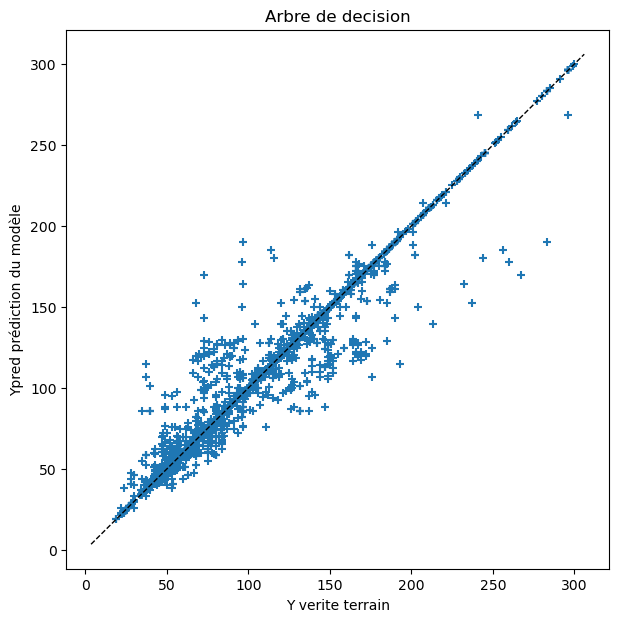

In [166]:
# Tracer le graphique de dispersion des valeurs prédites par rapport aux vraies valeurs
fig = plt.figure(figsize = (7, 7))
plt.scatter(Y_train,predict_Train, marker='+')
plt.plot([xmin,xmax], [ymin,ymax], lw=1, color='k', ls='--')
plt.xlabel( 'Y verite terrain' )
plt.ylabel( 'Ypred prédiction du modèle' )
plt.title('Arbre de decision')
plt.show()

In [96]:
# Calcul du score r2 des prédictions du train
MSE = metrics.mean_squared_error(Y_train, predict_Train)
RMSE = np.sqrt(MSE)
#Calcule le pourcentage d'erreur des prédictions du train
EP = RMSE /np.mean(Y_train) 
#Affichage

print('MSE:', MSE)
print('RMSE:', RMSE)
print('R² score: {0:.2%}'.format(metrics.r2_score(Y_train, predict_Train)))
print("Pourcentage de bonne prédiction: {0:.2%}".format(1-EP))

MSE: 59.093137386480564
RMSE: 7.687206084558977
R² score: 97.26%
Pourcentage de bonne prédiction: 92.19%


In [97]:
# Faire des prédictions sur les données du test
predict_Test=arbre.predict(X_test)

In [98]:
# Définir les limites des axes x et y du graphe 

xmin = np.minimum(Y_test.min(), predict_Test.min()) - 1
xmax = np.maximum(Y_test.max(), predict_Test.max()) + 1
ymin = np.minimum(Y_test.min(), predict_Test.min()) - 1
ymax = np.maximum(Y_test.max(), predict_Test.max()) + 1

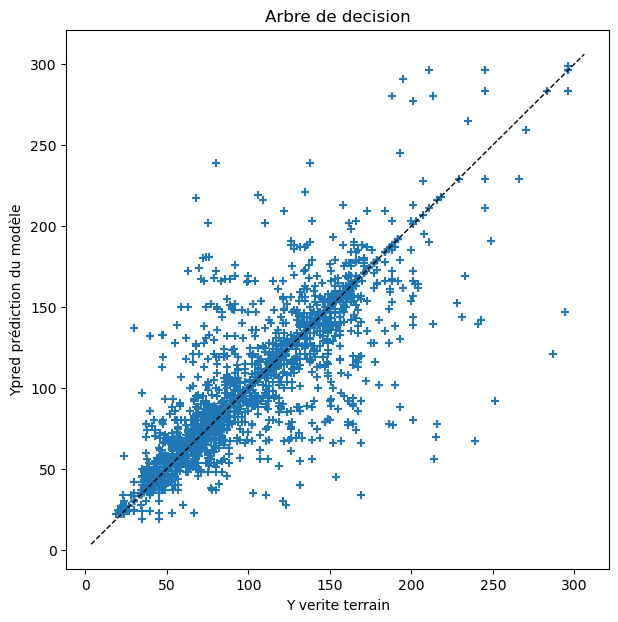

In [163]:
# Tracer le graphique de dispersion des valeurs prédites par rapport aux vraies valeurs
fig = plt.figure(figsize = (7, 7))
plt.scatter(Y_test,predict_Test, marker='+')
plt.plot([xmin,xmax], [ymin,ymax], lw=1, color='k', ls='--')
plt.xlabel( 'Y verite terrain' )
plt.ylabel( 'Ypred prédiction du modèle' )
plt.title('Arbre de decision')
plt.show()

In [100]:
# Calcul du score des prédictions du test
MSE = metrics.mean_squared_error(Y_test, predict_Test)
RMSE = np.sqrt(MSE)
#Calcule le pourcentage d'erreur des prédictions du test
EP = RMSE /np.mean(Y_test) 
#Affichage

print('MSE:', MSE)
print('RMSE:', RMSE)
print('R² score: {0:.2%}'.format(metrics.r2_score(Y_test, predict_Test)))
print("Pourcentage de bonne prédiction: {0:.2%}".format(1-EP))

MSE: 524.3592987720031
RMSE: 22.898892959529793
R² score: 76.47%
Pourcentage de bonne prédiction: 77.06%


<span style="font-size: 20px; color: green;"> Améliorer les Hyper-paramètres  </span><br>

In [101]:
#Création de l'arbre de décision de regression 
arbre=DecisionTreeRegressor(random_state=35)

In [102]:
# Définition des hyperparamètres à faire varier et de leurs valeurs à tester
hyperparametres = {'max_depth': [2, 4, 6, 8],
                   'min_samples_split': [2, 4, 6],
                   'min_samples_leaf': [1, 2, 4],
                   'max_leaf_nodes': [None, 5, 10, 15]}

In [103]:
# Recherche des meilleures combinaisons d'hyperparamètres avec GridSearchCV
grid = GridSearchCV(estimator=arbre, param_grid=hyperparametres, cv=5, scoring='r2')
grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=35),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'max_leaf_nodes': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6]},
             scoring='r2')

In [104]:
# Affichage des meilleurs hyperparamètres et de leur performance
print("Meilleurs hyperparamètres : ", grid.best_params_)
print("Meilleure performance : ", grid.best_score_)

Meilleurs hyperparamètres :  {'max_depth': 8, 'max_leaf_nodes': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Meilleure performance :  0.804325339938577


In [105]:
#Déclaration de l'arbre de décision
arbre = DecisionTreeRegressor( max_depth=8, max_leaf_nodes= None, min_samples_leaf= 2,min_samples_split= 2 )

In [106]:
#Entrainement de l'abre de décision 
arbre.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=2)

In [107]:
predicte_Test = arbre.predict(X_test)

In [108]:
xmin= np.minimum(Y_test.min(), predict_Test.min() )-1
xmax= np.maximum(Y_test.max(), predict_Test.max() )+1
ymin= np.minimum(Y_test.min(), predict_Test.min() )-1
ymax= np.maximum(Y_test.max(), predict_Test.max() )+1

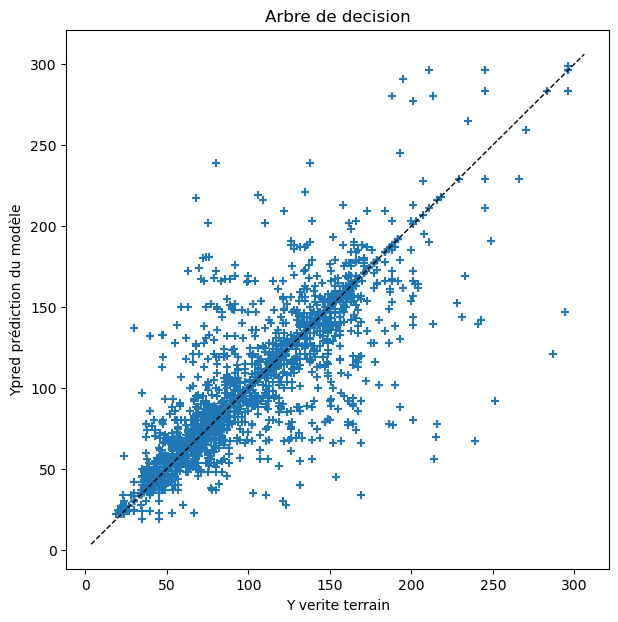

In [165]:
fig = plt.figure(figsize = (7, 7))
plt.scatter(Y_test,predict_Test, marker='+')
plt.plot([xmin,xmax], [ymin,ymax], lw=1, color='k', ls='--')
plt.xlabel( 'Y verite terrain' )
plt.ylabel( 'Ypred prédiction du modèle' )
plt.title('Arbre de decision')
plt.show()

In [110]:
# Calcul du score r2 des prédictions du test
MSE = metrics.mean_squared_error(Y_test, predicte_Test)
RMSE = np.sqrt(MSE)
EP = RMSE /np.mean(Y_test) #quantifie le pourcentage d'erreur des prédictions du test

print('MSE:', MSE)
print('RMSE:', RMSE)
print('R² score: {0:.2%}'.format(metrics.r2_score(Y_test, predicte_Test)))
print("Pourcentage de bonne prédiction: {0:.2%}".format(1-EP))

MSE: 433.9246783200646
RMSE: 20.83085879938858
R² score: 80.53%
Pourcentage de bonne prédiction: 79.13%


In [111]:
# cross-validation
cv_scores = cross_val_score(arbre, X, Y, cv=5, scoring='neg_mean_squared_error')

# Afficher les MSE pour chaque fold
MSE_scores = -cv_scores
print("MSE pour chaque échantillon:", MSE_scores)

# Calculer les RMSE pour chaque fold
rmse_scores = np.sqrt(-cv_scores)
EP = rmse_scores /np.mean(Y)

#quantifie le pourcentage d'erreur des prédictions de chaque échantillon
percentage_list = [round((1 - e) * 100, 2) for e in EP]
percentage_str_list = [f"{p}%" for p in percentage_list]
print("RMSE pour chaque échantillon:", rmse_scores)
print("Moyenne des RMSE :", rmse_scores.mean())
print("Pourcentage de bonne prédiction par échantillon:", percentage_str_list)

# R² cross-validation
r2_scores = cross_val_score(arbre, X, Y, cv=5, scoring='r2')
r2_percentage_list = [f"{round(r2 * 100, 2)}%" for r2 in r2_scores]
print("R² pour chaque échantillon:", r2_percentage_list)
print("Moyenne des R² : {0:.2%}".format(r2_scores.mean()))


MSE pour chaque échantillon: [397.24659018 385.14429562 431.28539277 401.19464491 439.40369021]
RMSE pour chaque échantillon: [19.93104589 19.62509352 20.7674118  20.02984386 20.96195817]
Moyenne des RMSE : 20.26307064555639
Pourcentage de bonne prédiction par échantillon: ['79.84%', '80.15%', '78.99%', '79.74%', '78.8%']
R² pour chaque échantillon: ['82.85%', '81.96%', '79.84%', '81.09%', '79.73%']
Moyenne des R² : 81.09%


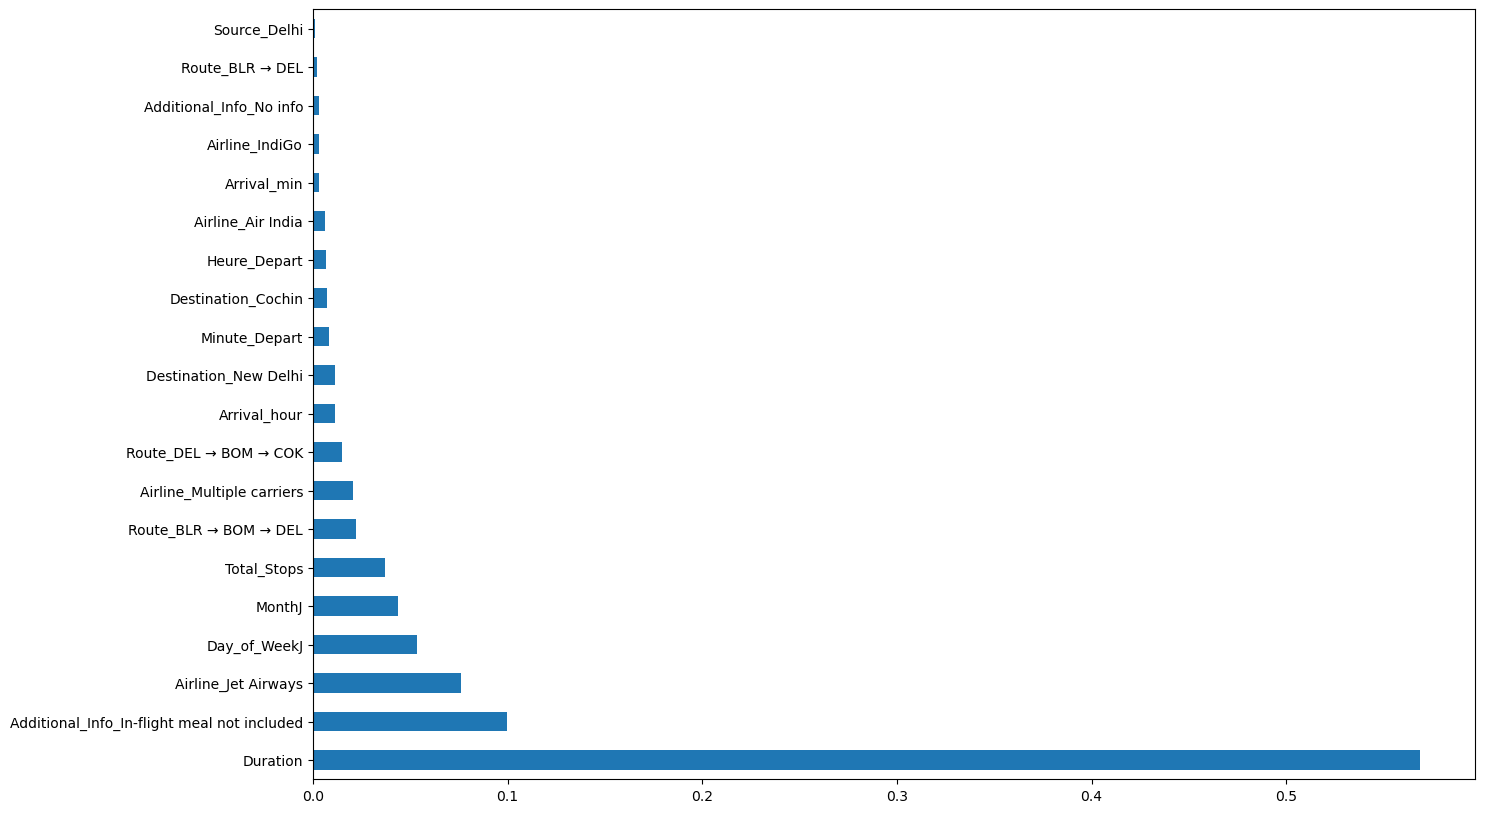

In [164]:
plt.figure(figsize=(15,10))
feat_imp = pd.Series(arbre.feature_importances_, index=X.columns)
feat_imp.nlargest(20).plot(kind='barh')
plt.show()

<span style="font-size: 30px; color: Red;"> Appliquer le RandomForest sur les donneés </span>

In [113]:
rfr=RandomForestRegressor(random_state = 35, max_depth = 20)

In [114]:
rfr.fit(X_train,Y_train)

RandomForestRegressor(max_depth=20, random_state=35)

In [115]:
prediction=rfr.predict(X_test)

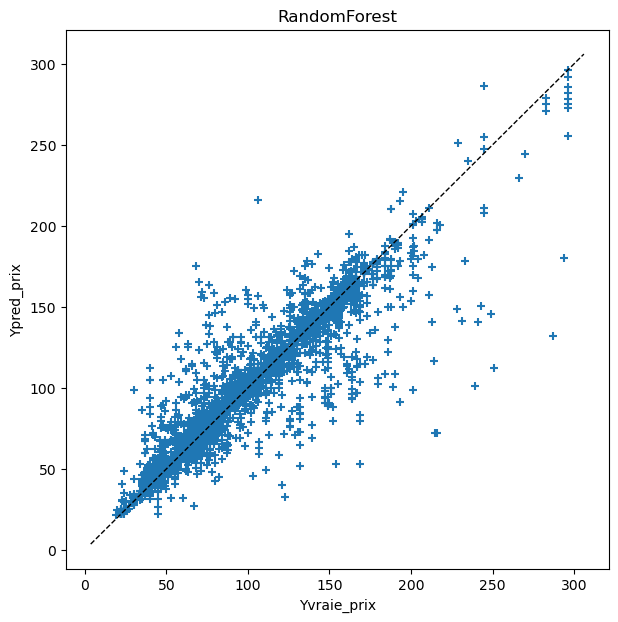

In [154]:
#Afichage des graphe 
xmin= np.minimum(Y_test.min(), predictions.min() )-10
xmax= np.maximum(Y_test.max(), predictions.max() )+10
ymin= np.minimum(Y_test.min(), predictions.min() )-10
ymax= np.maximum(Y_test.max(), predictions.max() )+10

fig = plt.figure(figsize = (7, 7))
plt.scatter(Y_test,prediction, marker='+')
plt.plot([xmin,xmax], [ymin,ymax], lw=1, color='k', ls='--')
plt.xlabel( 'Yvraie_prix' )
plt.ylabel( 'Ypred_prix' )
plt.title('RandomForest')
plt.show()

In [134]:
# Calcul du score r2 des prédictions du test
MSE = metrics.mean_squared_error(Y_test, prediction)
RMSE = np.sqrt(MSE)
EP = RMSE /np.mean(Y_test) #quantifie le pourcentage d'erreur des prédictions du test

print('MSE:', MSE)
print('RMSE:', RMSE)
print('R² score: {0:.2%}'.format(metrics.r2_score(Y_test, prediction)))
print("Pourcentage d'erreur: {0:.2%}".format(EP))

MSE: 325.7294767353179
RMSE: 18.047977081526835
R² score: 85.38%
Pourcentage d'erreur: 18.08%


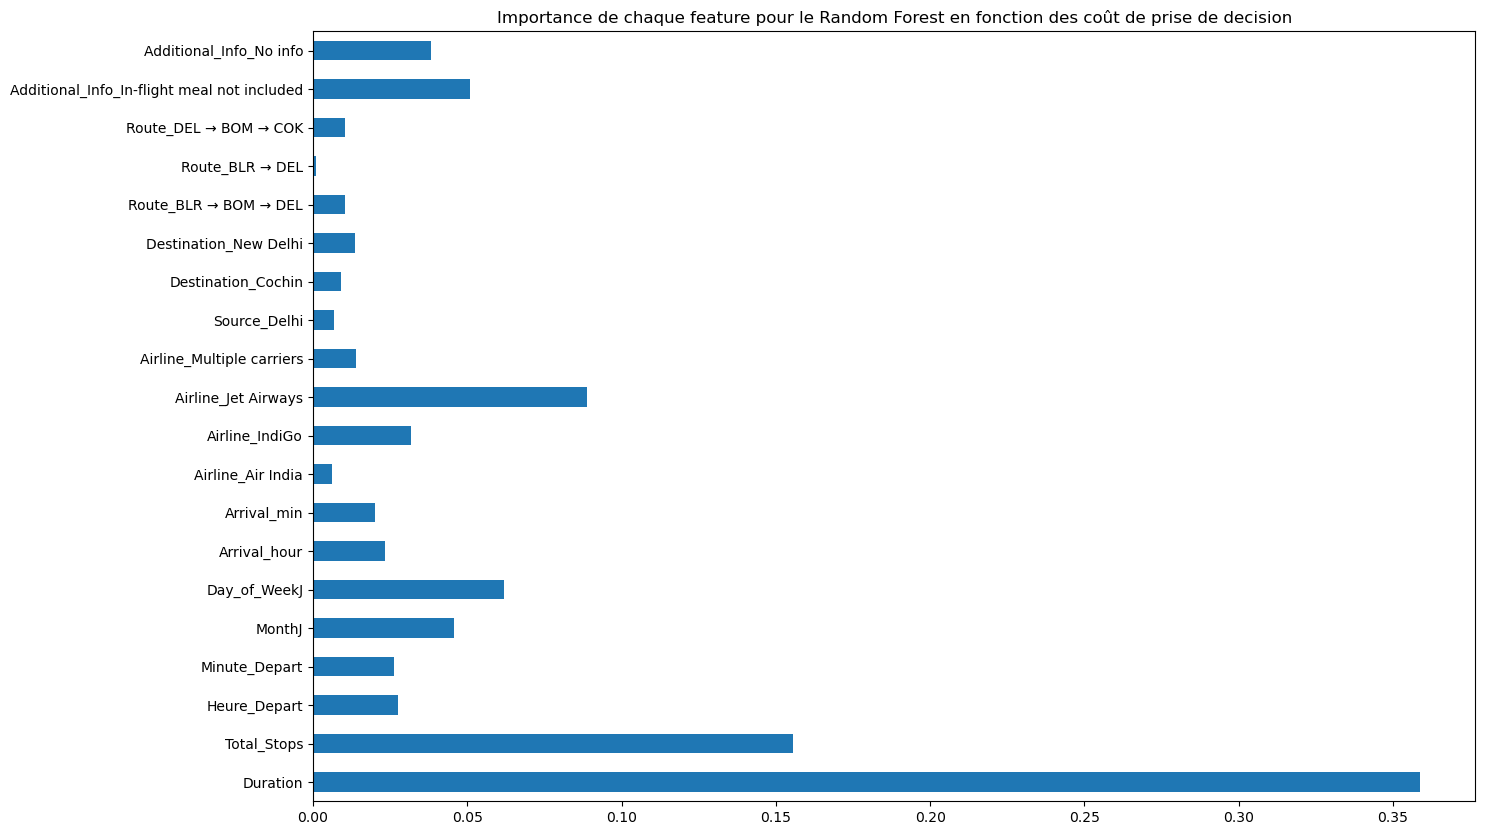

In [172]:
plt.figure(figsize=(15,10))
plt.title("Importance de chaque feature pour le Random Forest en fonction des coût de prise de decision")
feat_imp = pd.Series(rfr.feature_importances_, index=X.columns)
feat_imp.plot(kind='barh')
plt.show()

In [160]:
# cross-validation
cv_scores = cross_val_score(rfr, X, Y, cv=5, scoring='neg_mean_squared_error')

# Afficher les MSE pour chaque fold
MSE_scores = -cv_scores
print("MSE pour chaque échantillon:", MSE_scores)

# Calculer les RMSE pour chaque fold
rmse_scores = np.sqrt(-cv_scores)
EP = rmse_scores /np.mean(Y)

#quantifie le pourcentage d'erreur des prédictions de chaque échantillon
percentage_list = [round((e) * 100, 2) for e in EP]
percentage_str_list = [f"{p}%" for p in percentage_list]
print("RMSE pour chaque échantillon:", rmse_scores)
print("Moyenne des RMSE :", rmse_scores.mean())
print("Pourcentage de bonne prédiction par échantillon:", percentage_str_list)

# R² cross-validation
r2_scores = cross_val_score(rfr, X, Y, cv=5, scoring='r2')
r2_percentage_list = [f"{round(r2 * 100, 2)}%" for r2 in r2_scores]
print("R² pour chaque échantillon:", r2_percentage_list)
print("Moyenne des R² : {0:.2%}".format(r2_scores.mean()))




MSE pour chaque échantillon: [318.9080993  314.56317574 320.67288202 311.93139186 323.13290627]
RMSE pour chaque échantillon: [17.85799819 17.73592895 17.90734157 17.66157954 17.97589793]
Moyenne des RMSE : 17.827749234708218
Pourcentage de bonne prédiction par échantillon: ['18.06%', '17.94%', '18.11%', '17.86%', '18.18%']
R² pour chaque échantillon: ['86.23%', '85.5%', '85.09%', '85.07%', '85.09%']
Moyenne des R² : 85.39%


<span style="font-size: 20px; color: green;"> Améliorer les Hyper-paramètres  </span><br>

<span style="font-size: 15px; color: green;"> le meilleur nombre estimateurs  </span><br>

In [137]:
num_estimators = np.arange(1, 201 , 10)
num_estimators

array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141, 151, 161, 171, 181, 191])

In [121]:
scores_train = []
scores_test = []

In [122]:
for n in num_estimators:
    rfr=RandomForestRegressor(n_estimators= n,random_state = 35)
    rfr.fit(X_train,Y_train)
    scores_test.append(rfr.score(X_test, Y_test))
    scores_train.append(rfr.score(X_train, Y_train))

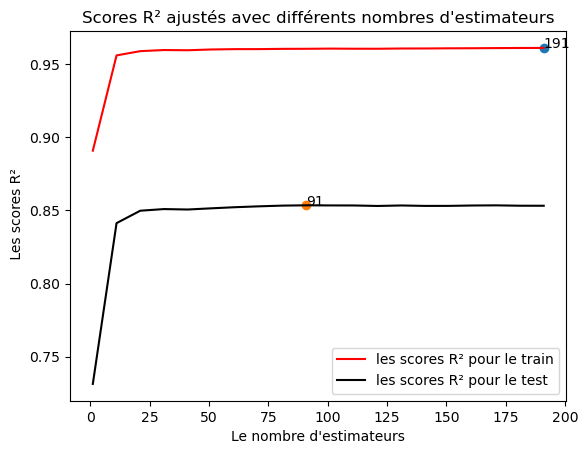

In [162]:
plt.plot(num_estimators, scores_train, label = 'les scores R² pour le train', color='red')
plt.plot(num_estimators, scores_test, label = 'les scores R² pour le test', color = 'black')
plt.scatter(num_estimators[np.argmax(scores_train)], np.max(scores_train))
plt.text(num_estimators[np.argmax(scores_train)], np.max(scores_train), "{}".format(num_estimators[np.argmax(scores_train)]))
plt.scatter(num_estimators[np.argmax(scores_test)], np.max(scores_test))
plt.text(num_estimators[np.argmax(scores_test)], np.max(scores_test), "{}".format(num_estimators[np.argmax(scores_test)]))
plt.xlabel("Le nombre d'estimateurs")
plt.ylabel(" Les scores R²")
plt.title("Scores R² ajustés avec différents nombres d'estimateurs")
plt.legend()
plt.show()

On peux donc conclure que le meilleur nombre d'estimateurs pour le test sera 91

<span style="font-size: 15px; color: green;"> Le meilleur nombre de features  </span>

In [124]:
num_features = np.arange(1, 21)

In [125]:
scores_trainF = []
scores_testF = []

In [126]:
for n in num_features:
    rfr=RandomForestRegressor(n_estimators= 91, max_depth=20, max_features = n, random_state = 35)
    rfr.fit(X_train,Y_train)
    scores_testF.append(rfr.score(X_test, Y_test))
    scores_trainF.append(rfr.score(X_train, Y_train))

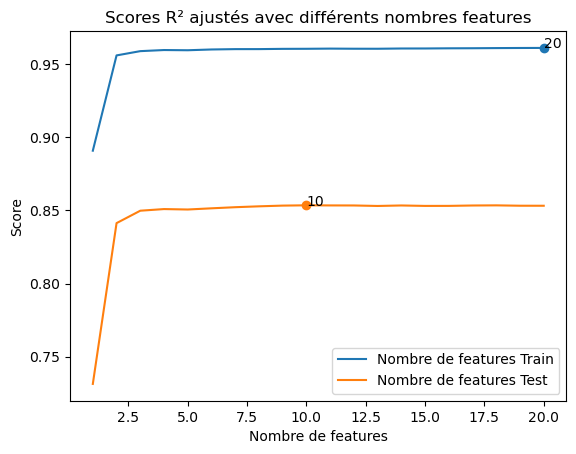

In [156]:
plt.plot(num_features, scores_train, label = 'Nombre de features Train')
plt.plot(num_features, scores_test, label = 'Nombre de features Test')
plt.scatter(num_features[np.argmax(scores_train)], np.max(scores_train))
plt.text(num_features[np.argmax(scores_train)], np.max(scores_train), "{}".format(num_features[np.argmax(scores_train)]))
plt.scatter(num_features[np.argmax(scores_test)], np.max(scores_test))
plt.text(num_features[np.argmax(scores_test)], np.max(scores_test), "{}".format(num_features[np.argmax(scores_test)]))
plt.xlabel("Nombre de features")
plt.ylabel("Score")
plt.title("Scores R² ajustés avec différents nombres features")
plt.legend()
plt.show()

On peux donc conclure que le meilleur nombre features pour le test sera 10

In [128]:
rfr=RandomForestRegressor(n_estimators= 91,max_depth=20,max_features =10, random_state = 35)

In [129]:
# Training the model
rfr.fit(X_train,Y_train)

RandomForestRegressor(max_depth=20, max_features=10, n_estimators=91,
                      random_state=35)

In [130]:
predictF=rfr.predict(X_test)

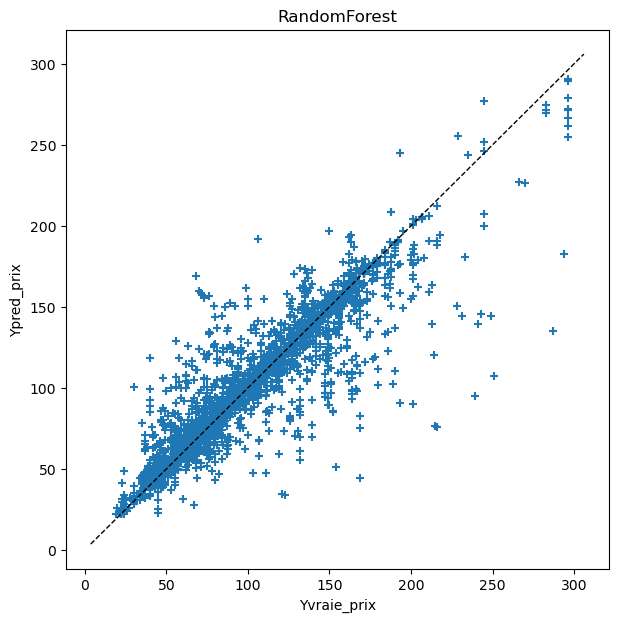

In [151]:
xmin= np.minimum(Y_test.min(), predictions.min() )-10
xmax= np.maximum(Y_test.max(), predictions.max() )+10
ymin= np.minimum(Y_test.min(), predictions.min() )-10
ymax= np.maximum(Y_test.max(), predictions.max() )+10

fig = plt.figure(figsize = (7, 7))
plt.scatter(Y_test,predictF, marker='+')
plt.plot([xmin,xmax], [ymin,ymax], lw=1, color='k', ls='--')
plt.xlabel( 'Yvraie_prix' )
plt.ylabel( 'Ypred_prix' )
plt.title('RandomForest')
plt.show()

In [157]:
# Calcul du score des prédictions du test
MSE = metrics.mean_squared_error(Y_test, predictF)
RMSE = np.sqrt(MSE)
EP = RMSE /np.mean(Y_test) #quantifie le pourcentage d'erreur des prédictions du test
print('MSE:', MSE)
print('RMSE:', RMSE)
print('R² score: {0:.2%}'.format(metrics.r2_score(Y_test, predictF)))
print("Pourcentage d'erreur: {0:.2%}".format(EP))

MSE: 320.96895644485716
RMSE: 17.915606505079786
R² score: 85.60%
Pourcentage d'erreur: 17.95%


In [173]:
# cross-validation
cv_scores = cross_val_score(rfr, X, Y, cv=5, scoring='neg_mean_squared_error')

# Afficher les MSE pour chaque fold
MSE_scores = -cv_scores
print("MSE pour chaque échantillon:", MSE_scores)

# Calculer les RMSE pour chaque fold
rmse_scores = np.sqrt(-cv_scores)
EP = rmse_scores /np.mean(Y)

#quantifie le pourcentage d'erreur des prédictions de chaque échantillon
percentage_list = [round(( e) * 100, 2) for e in EP]
percentage_str_list = [f"{p}%" for p in percentage_list]
print("RMSE pour chaque échantillon:", rmse_scores)
print("Moyenne des RMSE :", rmse_scores.mean())
print("Pourcentage de bonne prédiction par échantillon:", percentage_str_list)

# R² cross-validation
r2_scores = cross_val_score(rfr, X, Y, cv=5, scoring='r2')
r2_percentage_list = [f"{round(r2 * 100, 2)}%" for r2 in r2_scores]
print("R² pour chaque échantillon:", r2_percentage_list)
print("Moyenne des R² : {0:.2%}".format(r2_scores.mean()))


MSE pour chaque échantillon: [318.9080993  314.56317574 320.67288202 311.93139186 323.13290627]
RMSE pour chaque échantillon: [17.85799819 17.73592895 17.90734157 17.66157954 17.97589793]
Moyenne des RMSE : 17.827749234708218
Pourcentage de bonne prédiction par échantillon: ['18.06%', '17.94%', '18.11%', '17.86%', '18.18%']
R² pour chaque échantillon: ['86.23%', '85.5%', '85.09%', '85.07%', '85.09%']
Moyenne des R² : 85.39%
